In [ ]:
#connecting the Program to the google drive containing the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing files from google drive
import pandas as pd
import numpy as np
dataframe = pd.read_csv('/content/drive/My Drive/EV/Electric_Vehicle_Population_Data.csv')

In [ ]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

**DATA UNDERSTANDING**

In [ ]:
#Dataset overview
dataframe.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
#dataset info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

#### **DataFrame** info: 150,482 entries, 17 columns, various data types, some missing values

**DATA CLEANING**

In [ ]:
# print shape of data
print('Number of instances : ', dataframe.shape[0])
print('Number of features : ', dataframe.shape[1])

#dataframe.head(5)

Number of instances :  150482
Number of features :  17


In [ ]:
# initialize category and numeric data
category = [i for i in dataframe.columns if dataframe[i].dtype == 'object']
numerical = [i for i in dataframe.columns if dataframe[i].dtype != 'object']

In [ ]:
# show statistical summary of numeric data
dataframe[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,150479.0,9.816834e+04,2.473612e+03,1.730000e+03,9.805200e+04,9.812200e+04,9.837000e+04,9.957700e+04
Model Year,150482.0,2.020005e+03,3.015209e+00,1.997000e+03,2.018000e+03,2.021000e+03,2.023000e+03,2.024000e+03
Electric Range,150482.0,6.787784e+01,9.623001e+01,0.000000e+00,0.000000e+00,1.800000e+01,9.700000e+01,3.370000e+02
Base MSRP,150482.0,1.312645e+03,9.231310e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,150141.0,2.934395e+01,1.482483e+01,1.000000e+00,1.800000e+01,3.300000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,150482.0,2.111122e+08,8.196388e+07,4.385000e+03,1.693473e+08,2.150306e+08,2.399119e+08,4.792548e+08
2020 Census Tract,150479.0,5.297195e+10,1.638841e+09,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


In [ ]:
# show statistical summary of category data
dataframe[category].describe().T

,count,unique,top,freq
VIN (1-10),150482,9529,7SAYGDEE7P,807
County,150479,183,King,79075
City,150479,683,Seattle,25675
State,150482,41,WA,150141
Make,150482,37,TESLA,68983
Model,150482,127,MODEL Y,28502
Electric Vehicle Type,150482,2,Battery Electric Vehicle (BEV),116807
Clean Alternative Fuel Vehicle (CAFV) Eligibility,150482,3,Eligibility unknown as battery range has not b...,69698
Vehicle Location,150475,822,POINT (-122.12302 47.67668),3869
Electric Utility,150479,76,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),55634


Identifying missing values in the dataset: a concise summary revealing the count of null values in each column.

In [ ]:
# show missing values of data
dataframe.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [ ]:
# show columns that have missing values
dataframe.columns[dataframe.isnull().any()]

Index(['County', 'City', 'Postal Code', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
# drop the missing values on the subset County and City
dataframe.dropna(subset=['County', 'City'], inplace=True)

# show missing values of data
dataframe.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 338
DOL Vehicle ID                                         0
Vehicle Location                                       4
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [ ]:
# Define a procedure to impute missing values for numeric data
def impute_numeric_data(input_data, target_columns, imputation_method):
    for column in target_columns:
        if imputation_method == 'median':
            value_to_fill = input_data[column].median()
        elif imputation_method == 'mean':
            value_to_fill = input_data[column].mean()
        input_data[column].fillna(value_to_fill, inplace=True)

# Define a procedure to impute missing values for categorical data
def impute_categorical_data(input_data, target_columns):
    for column in target_columns:
        mode_value = input_data[column].mode().iloc[0]
        input_data[column].fillna(mode_value, inplace=True)

# Apply imputation procedures for numeric and categorical data
impute_numeric_data(dataframe, ['Legislative District'], 'median')
impute_categorical_data(dataframe, ['Model', 'Vehicle Location'])

# Show missing values in the data
dataframe.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

info command indicates that there are 16 columns, 150482 rows, and ther are no null values in the data now

# **DATA PREPARATION**

### **FEATURE ENGINEERING**

Data preprocessing steps: Cleaned 'Electric Vehicle Type' values, renamed 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' column, extracted 'Longitude' and 'Latitude' from 'Vehicle Location', mapped state codes to names, and extracted substrings from 'Electric Utility' column.

In [ ]:
# update values in 'Electric Vehicle Type' column
dataframe['Electric Vehicle Type'] = dataframe['Electric Vehicle Type'].apply(lambda x: \
                                                                x.replace('Plug-in Hybrid Electric Vehicle (PHEV)', 'PHEV')
                                                                .replace('Battery Electric Vehicle (BEV)', 'BEV'))

# rename column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' to 'Clean Alternative Fuel Vehicle Eligibility'
dataframe.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Clean Alternative Fuel Vehicle Eligibility'}, inplace=True)

# define a function to extract longitude and latitude from 'Vehicle Location' column
def extract_coordinates(point_string):
    coordinates = point_string.replace('POINT', '').replace('(', '').replace(')', '')
    longitude, latitude = coordinates.split()
    return float(longitude), float(latitude)

# apply the 'extract_coordinates' function to 'Vehicle Location' column and create new 'Longitude' and 'Latitude' columns
dataframe[['Longitude', 'Latitude']] = dataframe['Vehicle Location'].apply(extract_coordinates).apply(pd.Series)
dataframe = dataframe.drop('Vehicle Location', axis=1)

# define a function to map state codes to state names
def state_mapping(state_code):
    state_mapping = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }

    return state_mapping.get(state_code, 'Unknown')

# apply the 'state_mapping' function to 'State' column
dataframe['State'] = dataframe['State'].apply(state_mapping)

# define a function to extract the first substring from a column
def extract_substring(data, column_name):
    data[column_name] = data[column_name].str.split('-|\\|').str[0].str.strip()

# apply the 'extract_substring' function to 'Electric Utility' column
extract_substring(dataframe, 'Electric Utility')

In [ ]:
# identify categorical columns in the DataFrame
category = [i for i in dataframe.columns if dataframe[i].dtype == 'object']

# iterate over each categorical column
for col in category:
    # print the value counts for the current column
    print(dataframe[col].value_counts())
    print()

7SAYGDEE7P    807
7SAYGDEE6P    802
7SAYGDEE8P    775
7SAYGDEE2P    775
7SAYGDEEXP    772
             ... 
WAUEJBFW3P      1
YV4BR0DK8L      1
WMZ23BS05N      1
YV4BR0DK1K      1
JN1CF0BB5P      1
Name: VIN (1-10), Length: 9528, dtype: int64

King          79075
Snohomish     17307
Pierce        11542
Clark          8855
Thurston       5403
              ...  
Harford           1
Rockingham        1
Gwinnett          1
Onslow            1
Suffolk           1
Name: County, Length: 183, dtype: int64

Seattle          25675
Bellevue          7691
Redmond           5502
Vancouver         5310
Bothell           4861
                 ...  
Anthem               1
Bay Center           1
Felts Mills          1
Rich                 1
Ellicott City        1
Name: City, Length: 683, dtype: int64

Washington        150141
California            92
Virginia              35
Maryland              33
Texas                 20
North Carolina        13
Illinois              12
Colorado              11
Ari

In [ ]:
# show category columns
dataframe[category].columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility',
       'Electric Utility'],
      dtype='object')

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


Function to encode categorical data using one-hot, ordinal, or frequency encoding methods based on the specified approach. Encoding categorical data is crucial for machine learning models, enhancing their ability to interpret and utilize categorical information effectively.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# Define a function to encode categorical data into numeric
def encode_data(input_data, target_columns, encoding_method):

    # One-hot encoding
    if encoding_method == 'ohe':
        encoded_columns = pd.get_dummies(input_data[target_columns], prefix=target_columns)
        input_data = pd.concat([input_data, encoded_columns], axis=1)
        input_data.drop(target_columns, axis=1, inplace=True)

    # Ordinal encoding
    elif encoding_method == 'ordinal':
        ordinal_encoder = OrdinalEncoder()
        encoded_columns = ordinal_encoder.fit_transform(input_data[target_columns])
        input_data[target_columns] = encoded_columns
        input_data[target_columns] = encoded_columns.astype(int)

    # Frequency encoding
    elif encoding_method == 'frequency':
        frequency_encoder = ce.CountEncoder(cols=target_columns)
        input_data = frequency_encoder.fit_transform(input_data)


    return input_data


Applying encoding to ordinal and frequency columns in the DataFrame to convert categorical data into numeric representations,

In [ ]:
# define ordinal and frequency columns as list
ordinal_columns = ['State', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility']
frequency_columns = ['VIN (1-10)', 'County', 'City', 'Model', 'Electric Utility']

train = dataframe.copy()

# apply the 'encode_data' function to 'ordinal_columns' and 'frequency_columns'
train = encode_data(train, ordinal_columns, encoding_method='ordinal')
train = encode_data(train, frequency_columns, encoding_method='frequency')

train.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,2,79075,25675,37,98103.0,2020,13,208,0,0,258,0,43.0,249675142,27269,5.303300e+10,-122.343010,47.659185
1,7,79075,4861,37,98011.0,2022,15,663,1,2,25,0,1.0,233928502,88942,5.303302e+10,-122.205780,47.762405
2,4,835,552,37,98908.0,2023,15,663,1,2,25,0,14.0,229675939,1102,5.307700e+10,-120.602720,46.596562
3,245,79075,4622,37,98034.0,2018,31,27708,0,0,215,0,45.0,104714466,88942,5.303302e+10,-122.209285,47.711240
4,8,5403,3634,37,98501.0,2018,4,1917,1,0,97,0,22.0,185498386,88942,5.306701e+10,-122.896920,47.043535


In [ ]:
# show shape of df
dataframe.shape

(150479, 18)

In [ ]:
train.shape

(150479, 18)

kindly note that the encoded values are saved in "train " data frame. this will be used in modeling section

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150479 entries, 0 to 150481
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   VIN (1-10)                                  150479 non-null  int64  
 1   County                                      150479 non-null  int64  
 2   City                                        150479 non-null  int64  
 3   State                                       150479 non-null  int64  
 4   Postal Code                                 150479 non-null  float64
 5   Model Year                                  150479 non-null  int64  
 6   Make                                        150479 non-null  int64  
 7   Model                                       150479 non-null  int64  
 8   Electric Vehicle Type                       150479 non-null  int64  
 9   Clean Alternative Fuel Vehicle Eligibility  150479 non-null  int64  
 

note that the train has all the columns as numerical datatype now. this has been done for the modeling purpose.


# **Exploratory Data Analysis**

Univariate analysis

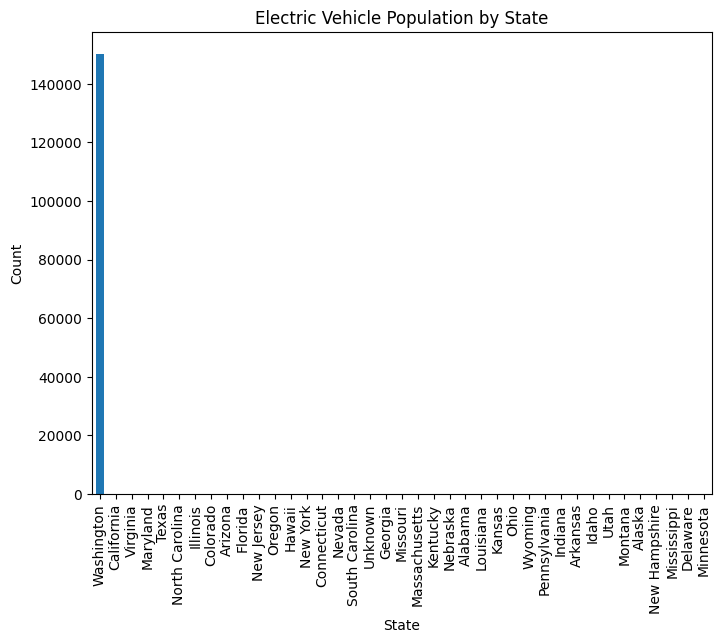

In [ ]:
#Electric Vehicle Population by state
Count_state = dataframe['State'].value_counts()
plt.figure(figsize=(8, 6))
Count_state.plot(kind='bar')
plt.title('Electric Vehicle Population by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Washington state has most vehicles


Which type of electric vehicle (e.g., hybrid, full electric) is most popular in
Washington state?

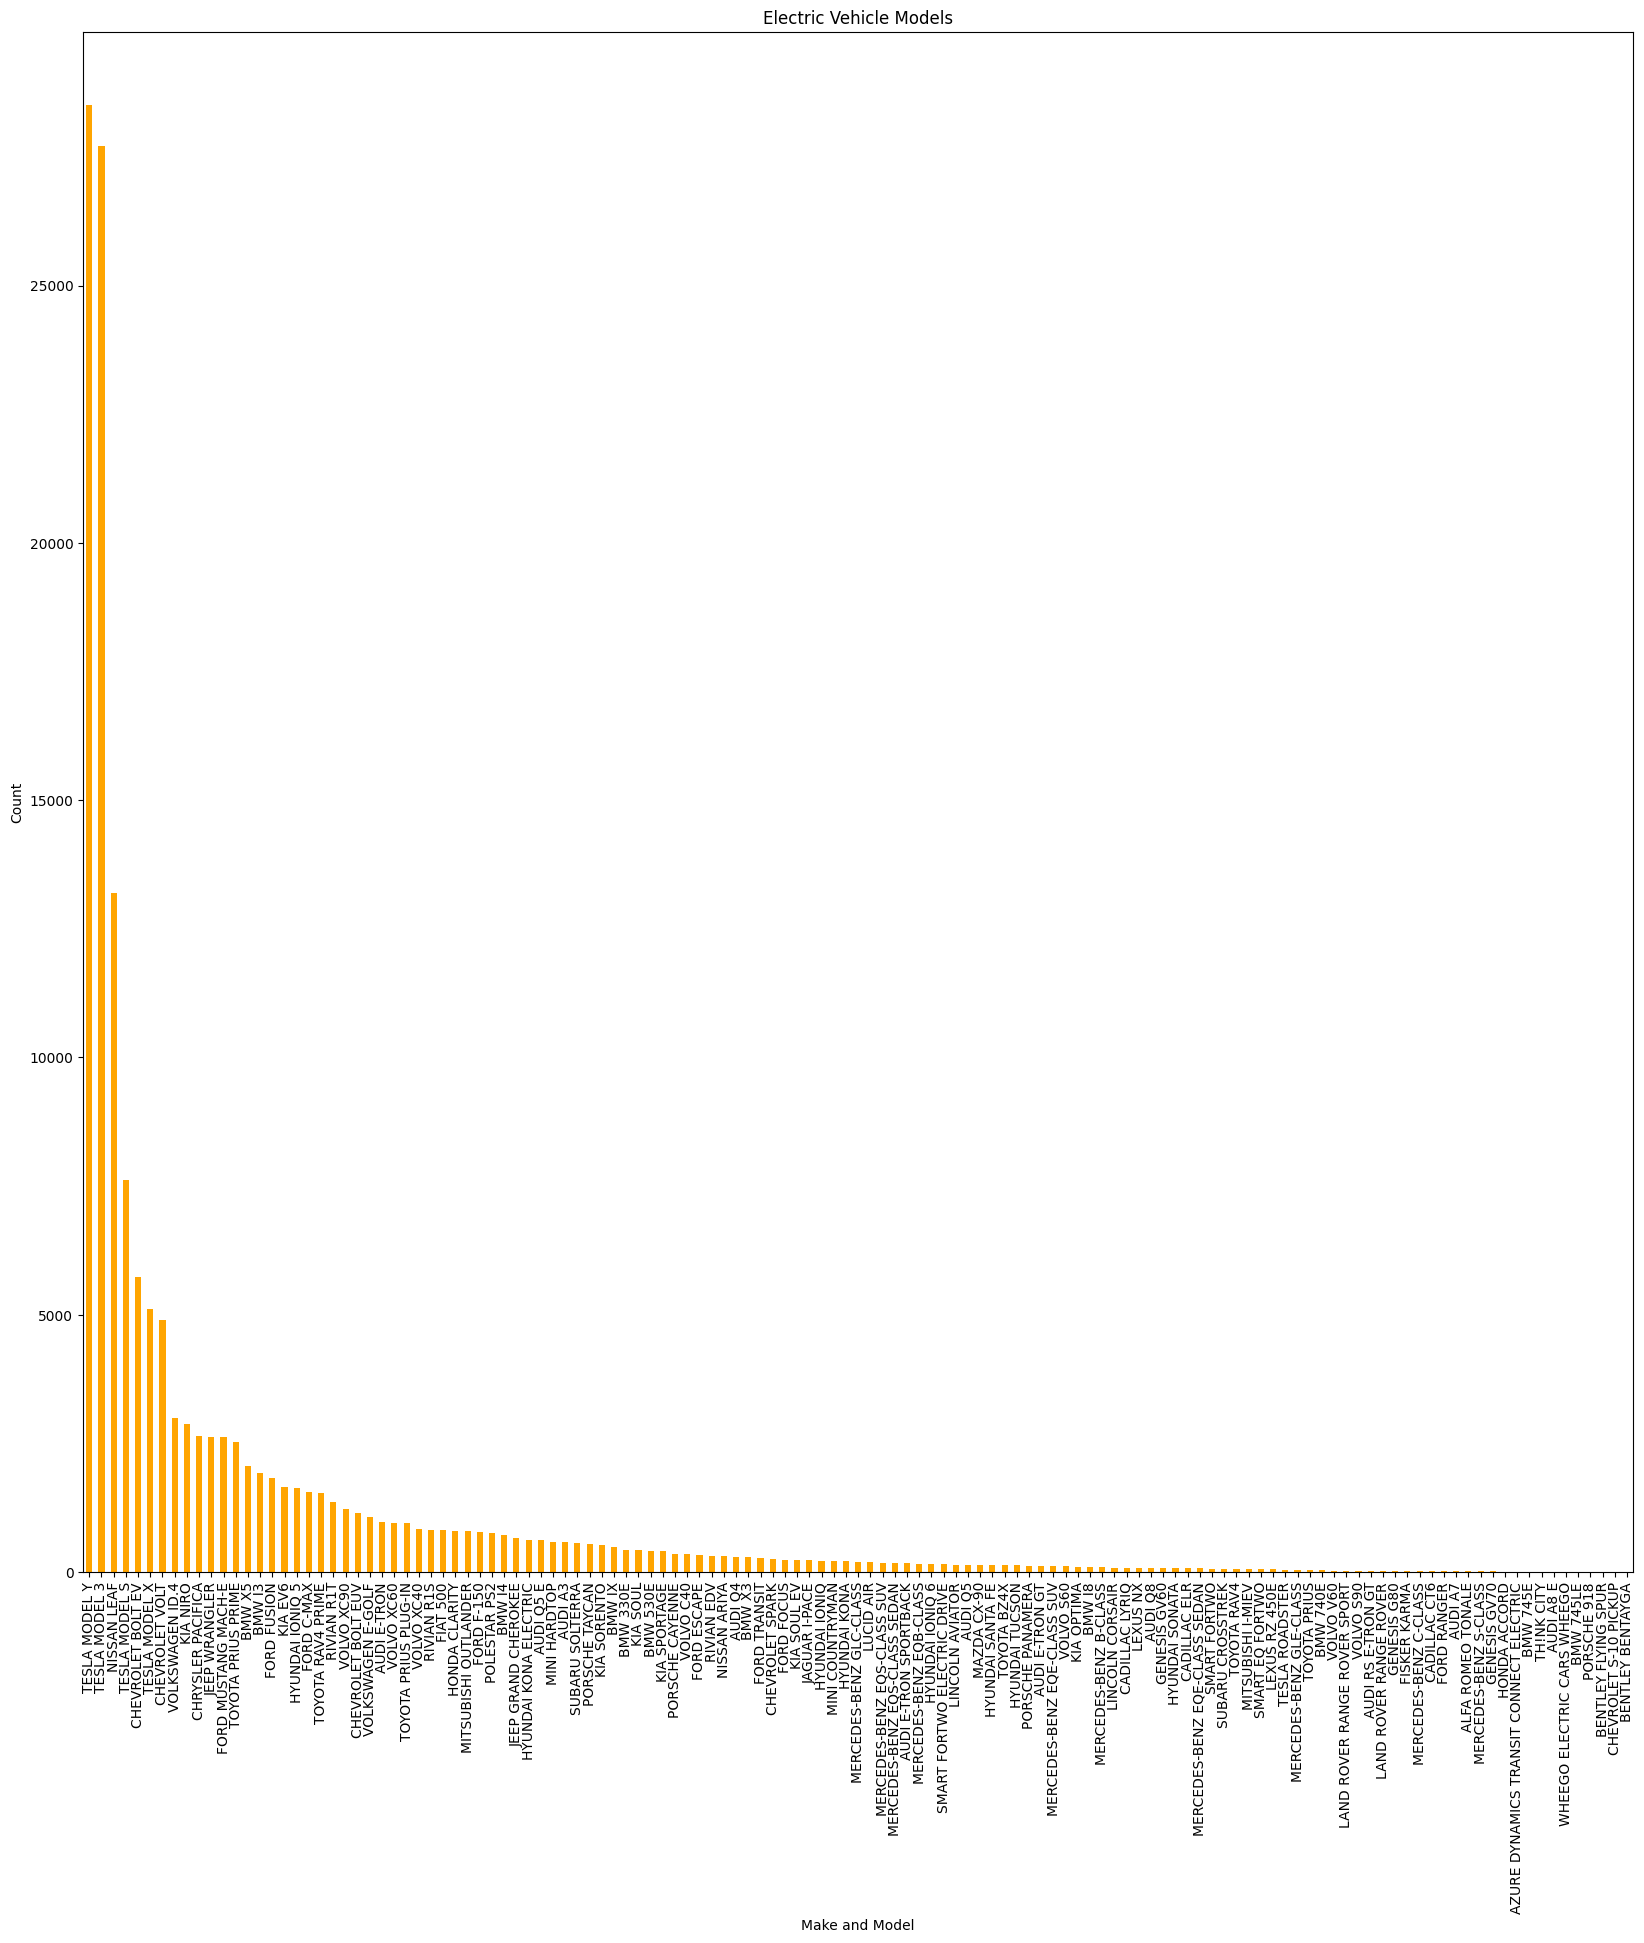

In [ ]:
count_model = dataframe['Make'] + ' ' + dataframe['Model']
count_model = count_model.value_counts()
plt.figure(figsize=(20, 20))
count_model.plot(kind='bar',color='orange')
plt.title('Electric Vehicle Models')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.show()

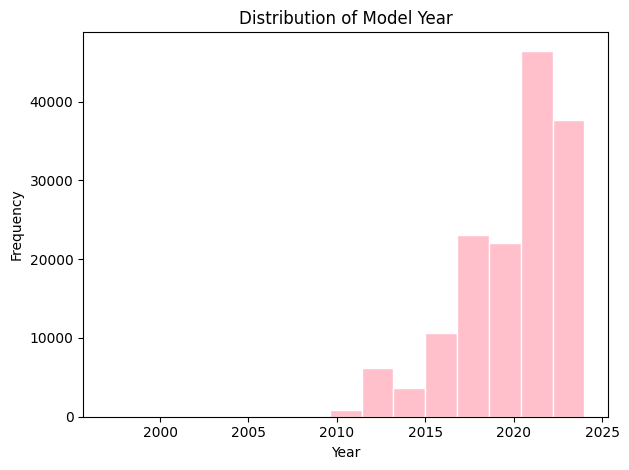

In [ ]:
#Histogram of Model Year
plt.hist(x=dataframe['Model Year'],edgecolor='white',bins=15,color='pink')
plt.title('Distribution of Model Year')
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.tight_layout()

In [ ]:
top_types = dataframe['County'].value_counts().nlargest(29).index
dataframe['County_modified'] = dataframe['County'].where(dataframe['County'].isin(top_types), 'Other')
count2 = dataframe['County_modified'].value_counts()

In [ ]:
count2

King            79075
Snohomish       17307
Pierce          11542
Clark            8855
Thurston         5403
Kitsap           4923
Spokane          3690
Whatcom          3668
Benton           1801
Skagit           1658
Island           1640
Other             951
Clallam           920
Jefferson         878
Chelan            863
San Juan          844
Yakima            835
Cowlitz           762
Mason             706
Lewis             598
Grays Harbor      533
Franklin          511
Kittitas          503
Grant             452
Walla Walla       360
Douglas           296
Whitman           262
Klickitat         239
Okanogan          211
Stevens           193
Name: County_modified, dtype: int64

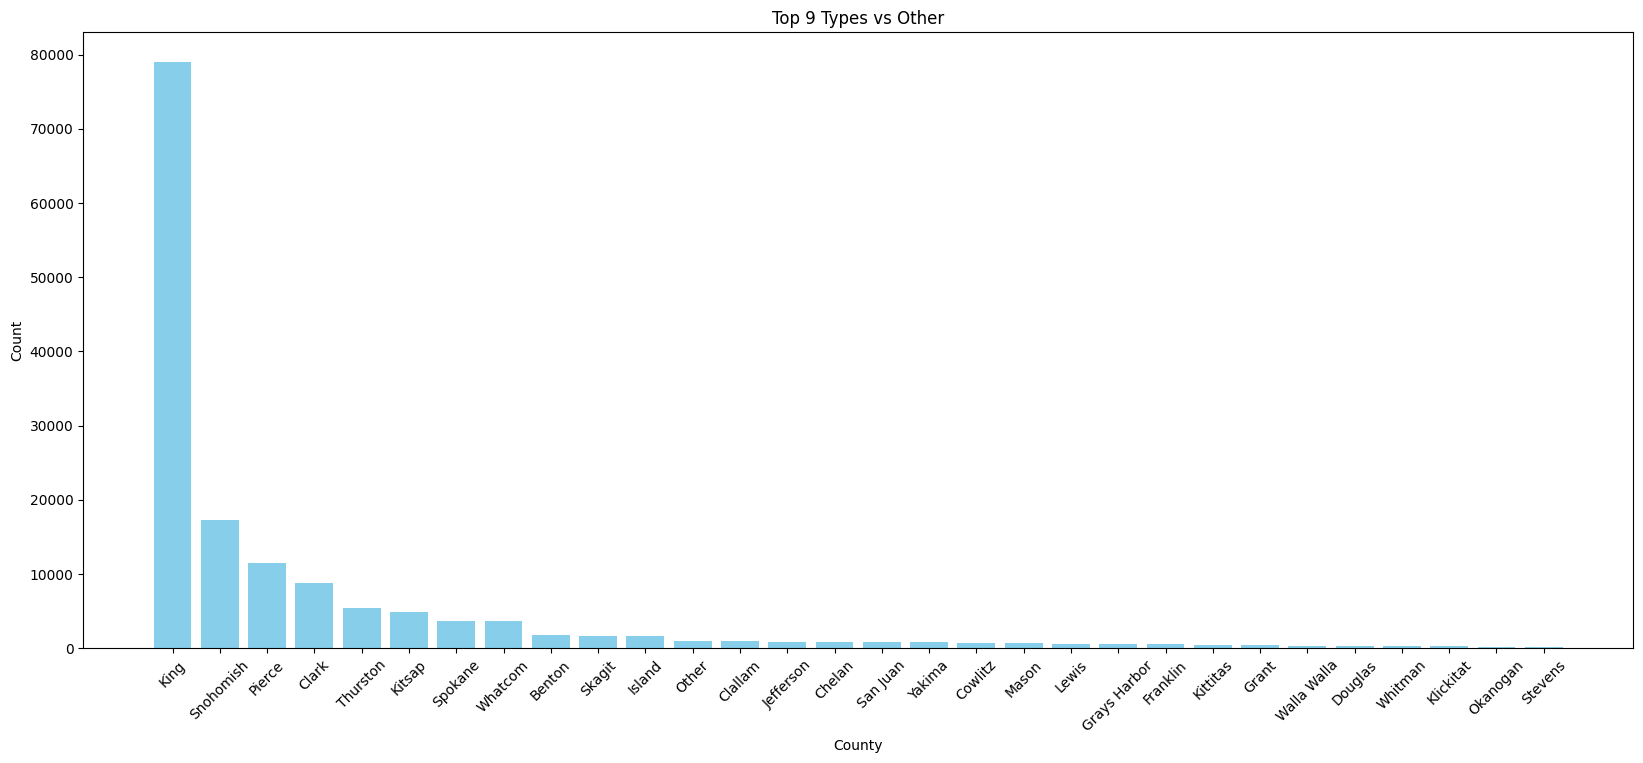

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.bar(count2.index, count2.values,color="skyblue")
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Clean Alternative Fuel Vehicle Eligibility'>

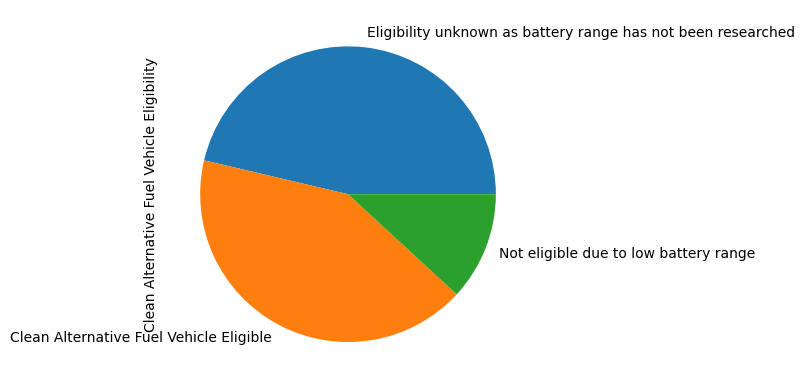

In [ ]:
dataframe['Clean Alternative Fuel Vehicle Eligibility'].value_counts().plot.pie()

Text(0.5, 1.0, 'Type of EV')

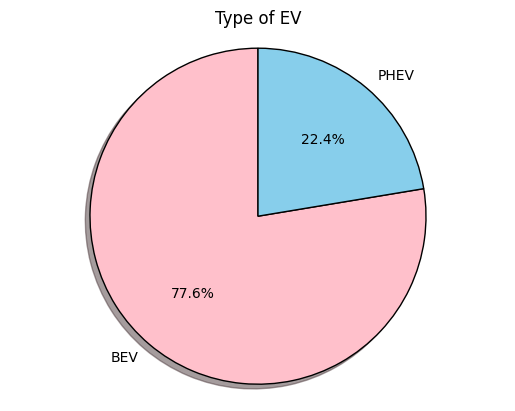

In [ ]:
#Pie Chart for Type of EV
fig , ax = plt.subplots()
sizes = dataframe['Electric Vehicle Type'].value_counts()
labels = 'BEV', 'PHEV'
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'black'},
        colors=['pink','skyblue'])
ax.axis('equal')
ax.set_title('Type of EV')

Text(0.5, 1.0, 'Range of EV based on its Type')

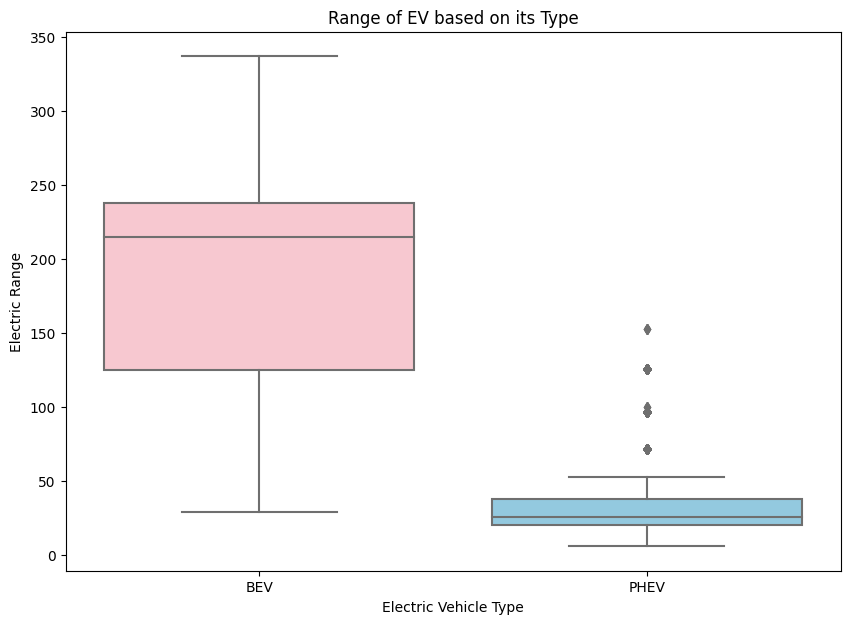

In [ ]:
data_clean = dataframe[(dataframe['Electric Range']>0)]
plt.figure(figsize=(10,7))
sns.boxplot(data = data_clean, x='Electric Vehicle Type',y='Electric Range',palette=['pink','skyblue'])
plt.title('Range of EV based on its Type')

Text(0.5, 1.0, 'CAFV Eligibility')

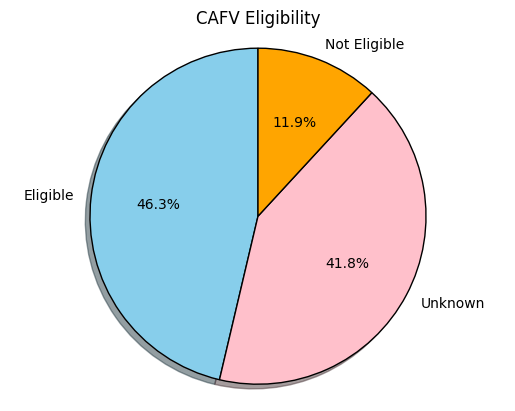

In [ ]:
#Pie chart for CAFV Eligibility
fig , ax = plt.subplots()
sizes = dataframe['Clean Alternative Fuel Vehicle Eligibility'].value_counts()
labels = 'Eligible', 'Unknown','Not Eligible'
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'black'},
        colors=['skyblue','pink','orange'])
ax.axis('equal')
ax.set_title('CAFV Eligibility')

In [ ]:
top_types = dataframe['Model'].value_counts().nlargest(29).index
dataframe1=dataframe
dataframe1['Model_Modified'] = dataframe1['Model'].where(dataframe1['Model'].isin(top_types), 'Other')
count3 = dataframe1['Model_Modified'].value_counts()

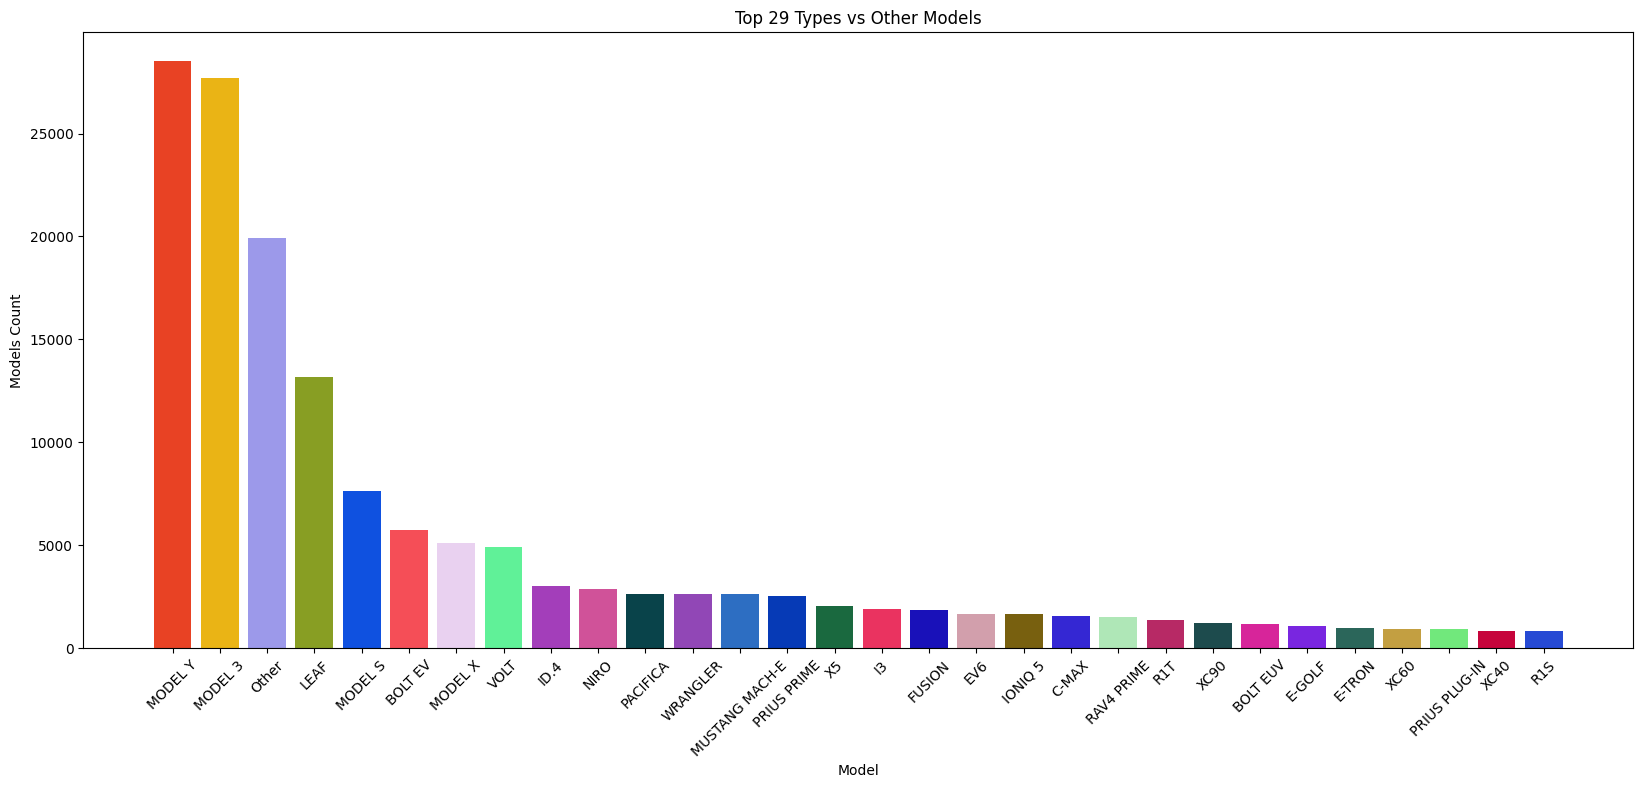

In [ ]:
# Sample data
categories = count3.index
values = count3.values

# Generating a list of random colors
colors = np.random.rand(len(categories), 3)

# Your existing code
plt.figure(figsize=(20, 8))
plt.bar(categories, values, color=colors)
plt.xlabel('Model')
plt.ylabel('Models Count')
plt.title('Top 29 Types vs Other Models')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_types = dataframe['City'].value_counts().nlargest(29).index
dataframe1['City_Modified'] = dataframe1['City'].where(dataframe1['City'].isin(top_types), 'Other')
count4 = dataframe1['City_Modified'].value_counts()

In [ ]:
count4.head(10)

Other        46890
Seattle      25675
Bellevue      7691
Redmond       5502
Vancouver     5310
Bothell       4861
Kirkland      4622
Sammamish     4436
Renton        4043
Olympia       3634
Name: City_Modified, dtype: int64

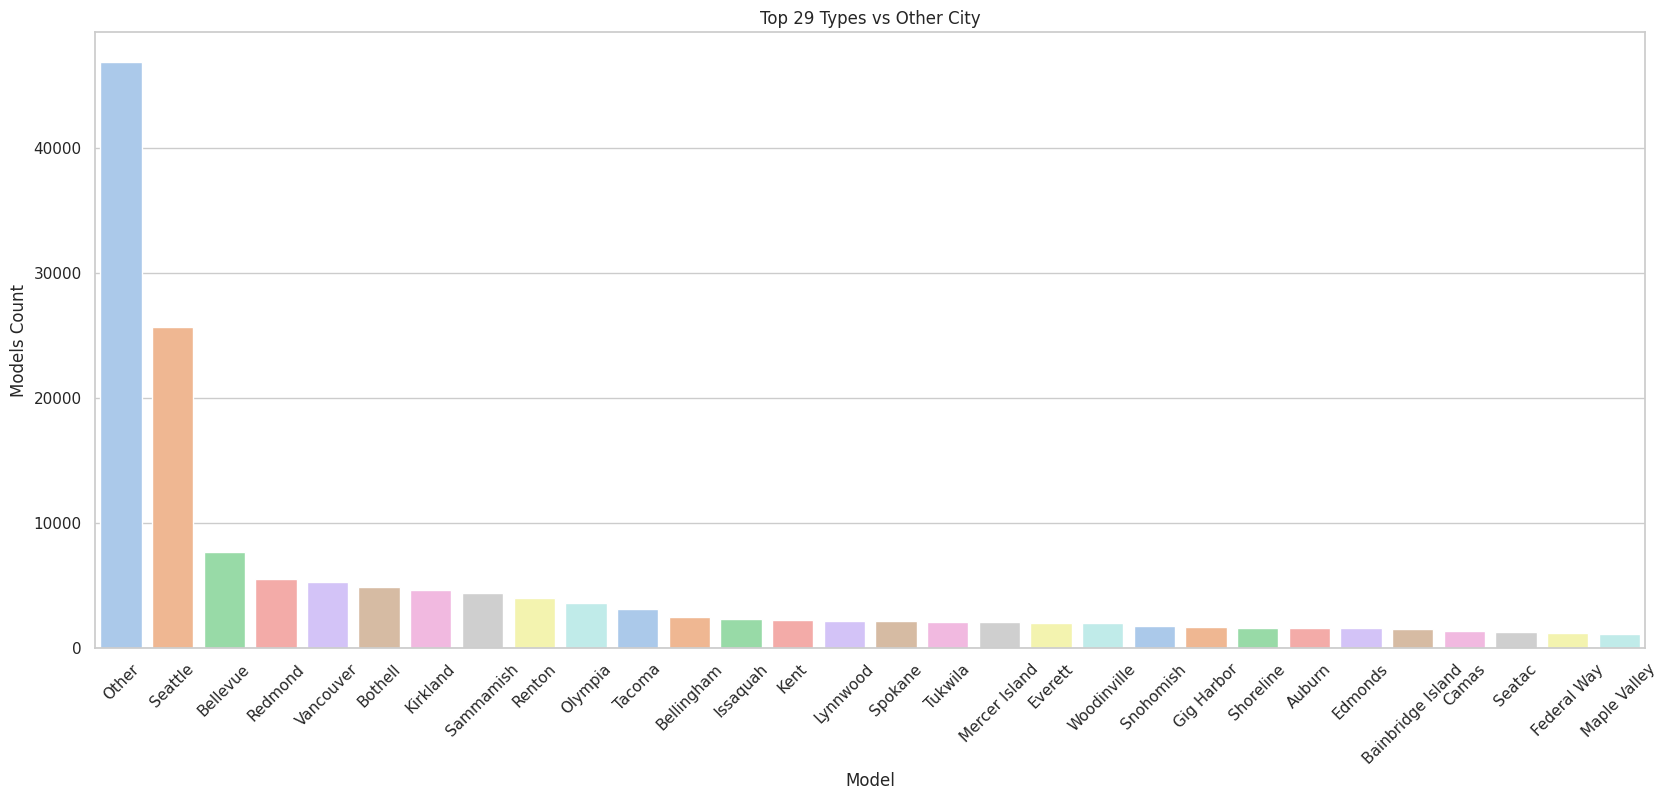

In [ ]:

import seaborn as sns

# Sample data
categories = count4.index
values = count4.values

# Set Seaborn style
sns.set(style="whitegrid")

# Your existing code using Seaborn
plt.figure(figsize=(20, 8))
sns.barplot(x=categories, y=values, palette="pastel")  # You can change 'viridis' to any Seaborn color palette you prefer
plt.xlabel('Model')
plt.ylabel('Models Count')
plt.title('Top 29 Types vs Other City')
plt.xticks(rotation=45)
plt.show()


In [ ]:
top_types = dataframe['Make'].value_counts().nlargest(29).index
dataframe1['Make_Modified'] = dataframe1['Make'].where(dataframe1['Make'].isin(top_types), 'Other')
count5 = dataframe['Make_Modified'].value_counts()

Which type of electric vehicle (e.g., hybrid, full electric) is most popular in
Washington state?

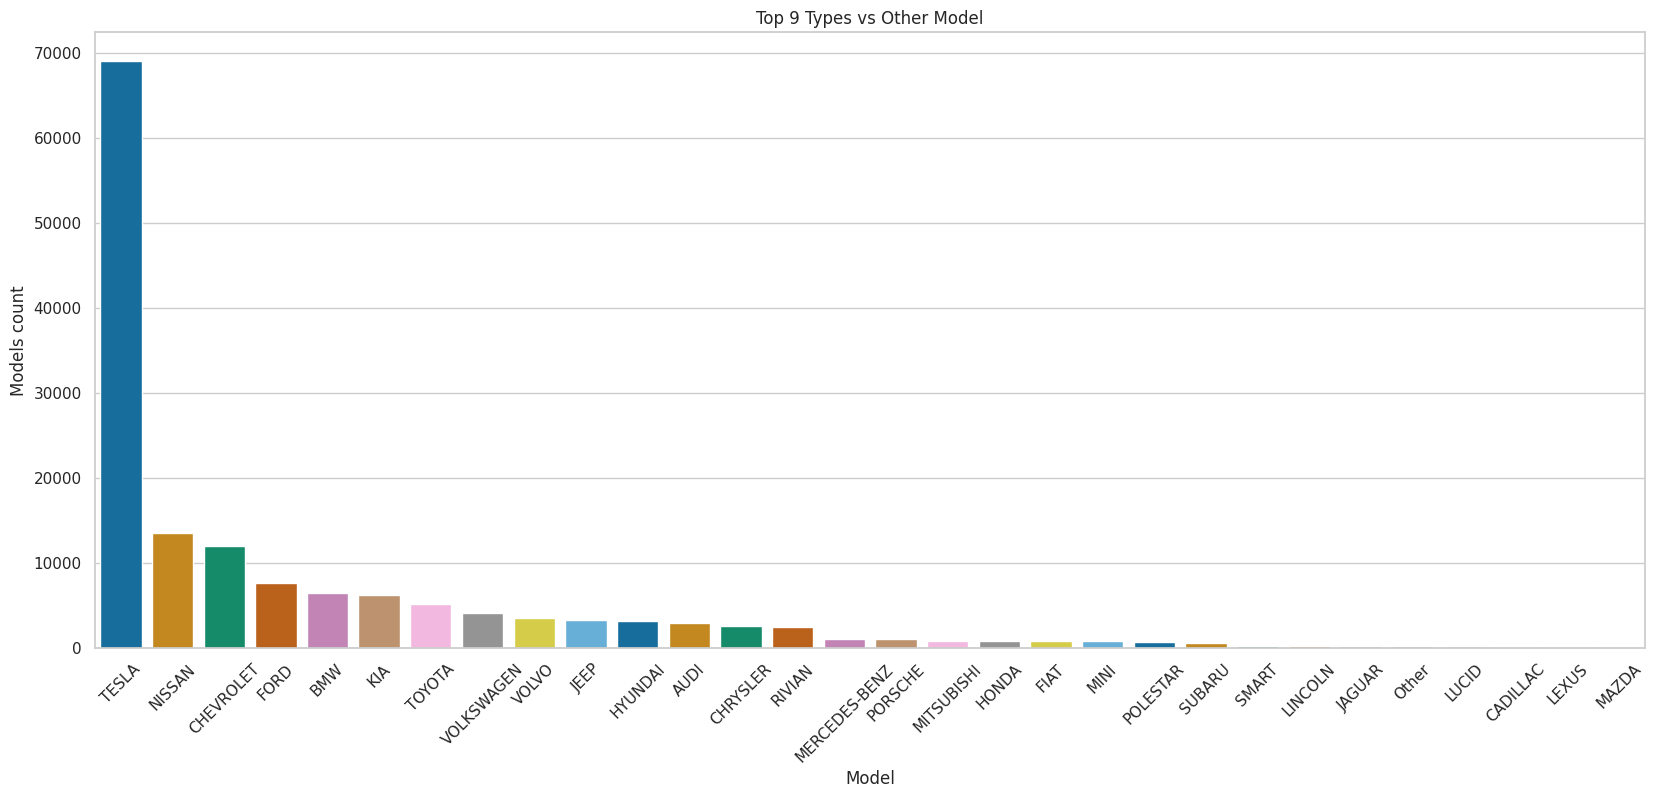

In [ ]:
categories = count5.index
values = count5.values

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Seaborn bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x=categories, y=values, palette="colorblind")
plt.xlabel('Model')
plt.ylabel('Models count')
plt.title('Top 9 Types vs Other Model')
plt.xticks(rotation=45)
plt.show()

B

**Bivariate analysis**

 Does the Clean Alternative Fuel Vehicle (CAFV) eligibility influence its
electric range?

Text(0.5, 1.0, 'Electric Range of Vehicle vs CAFV')

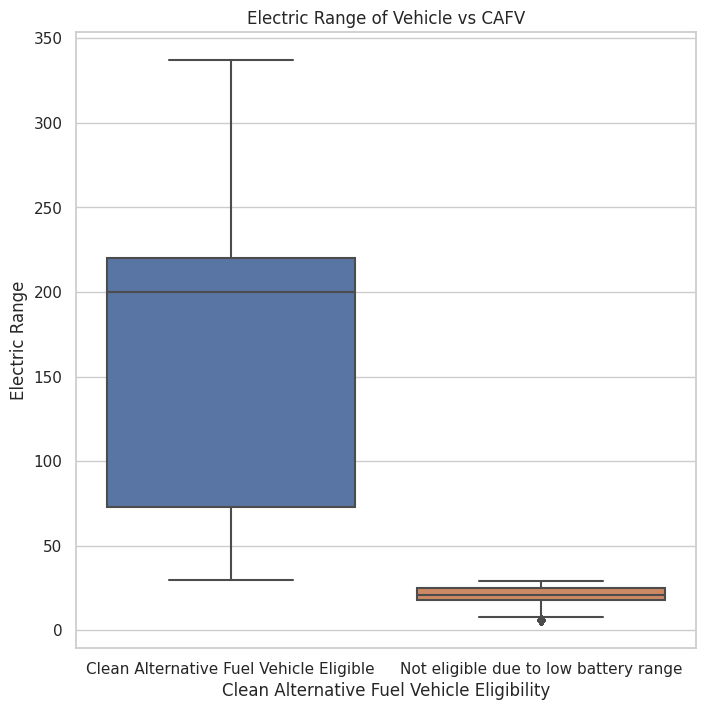

In [ ]:
data_decade = dataframe[(dataframe['Electric Range']>0) & (dataframe['Clean Alternative Fuel Vehicle Eligibility'])]
plt.figure(figsize=(8,8))
sns.boxplot(data = data_decade, x='Clean Alternative Fuel Vehicle Eligibility',y='Electric Range')
plt.title("Electric Range of Vehicle vs CAFV")

Which electric utilities support the highest number of electric vehicles? Is
there a relationship between the electric utility and the type of EV adopted?

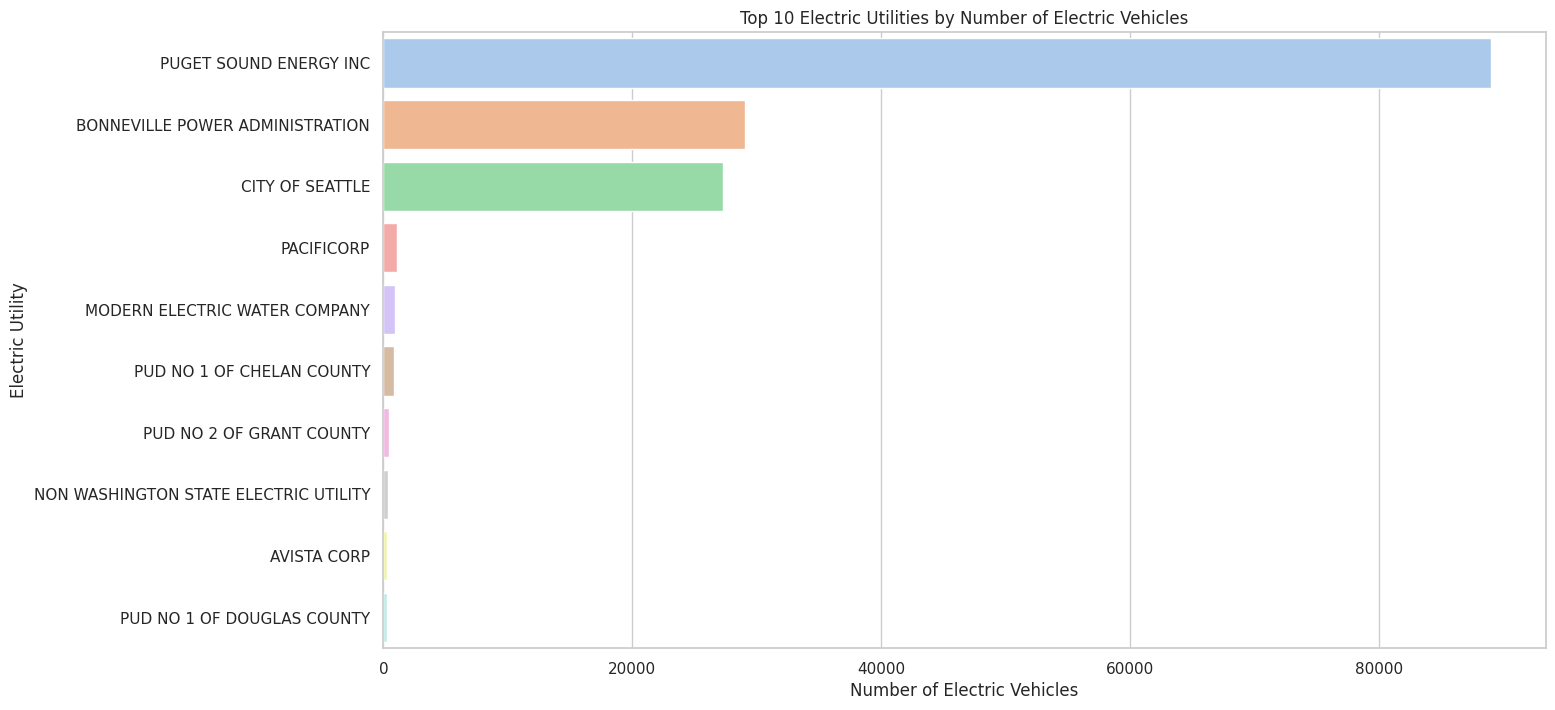

In [ ]:
plt.figure(figsize=(15, 8))
top_utilities = dataframe['Electric Utility'].value_counts().nlargest(10)
sns.barplot(x=top_utilities.values, y=top_utilities.index, palette='pastel')
plt.title('Top 10 Electric Utilities by Number of Electric Vehicles')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.show()



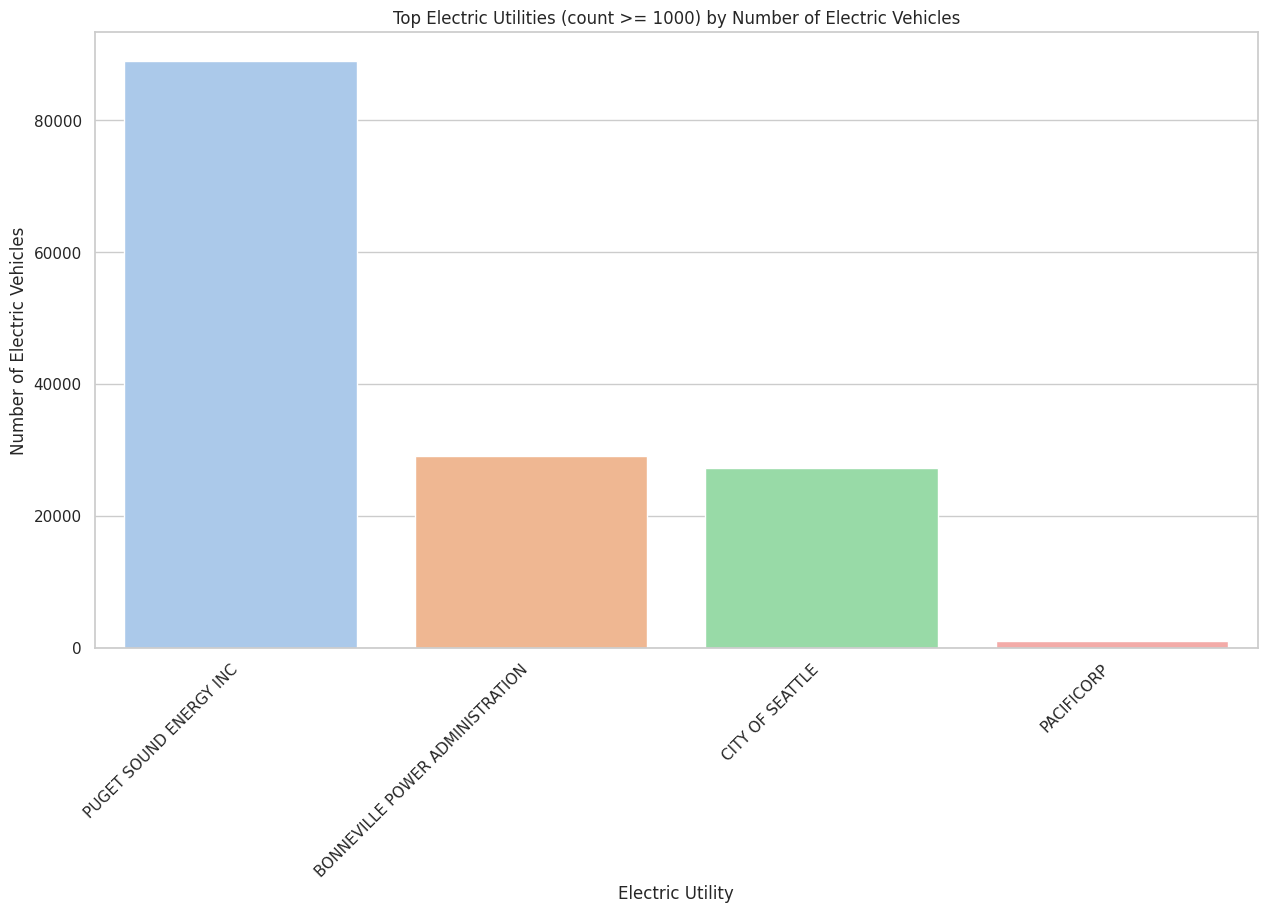

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataframe' is your DataFrame
plt.figure(figsize=(15, 8))

# Filter out electric utilities with counts below a threshold (e.g., 1000)
min_count_threshold = 1000
top_utilities = dataframe['Electric Utility'].value_counts()
top_utilities = top_utilities[top_utilities >= min_count_threshold]

sns.barplot(x=top_utilities.index, y=top_utilities.values, palette='pastel')
plt.title(f'Top Electric Utilities (count >= {min_count_threshold}) by Number of Electric Vehicles')
plt.xlabel('Electric Utility')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



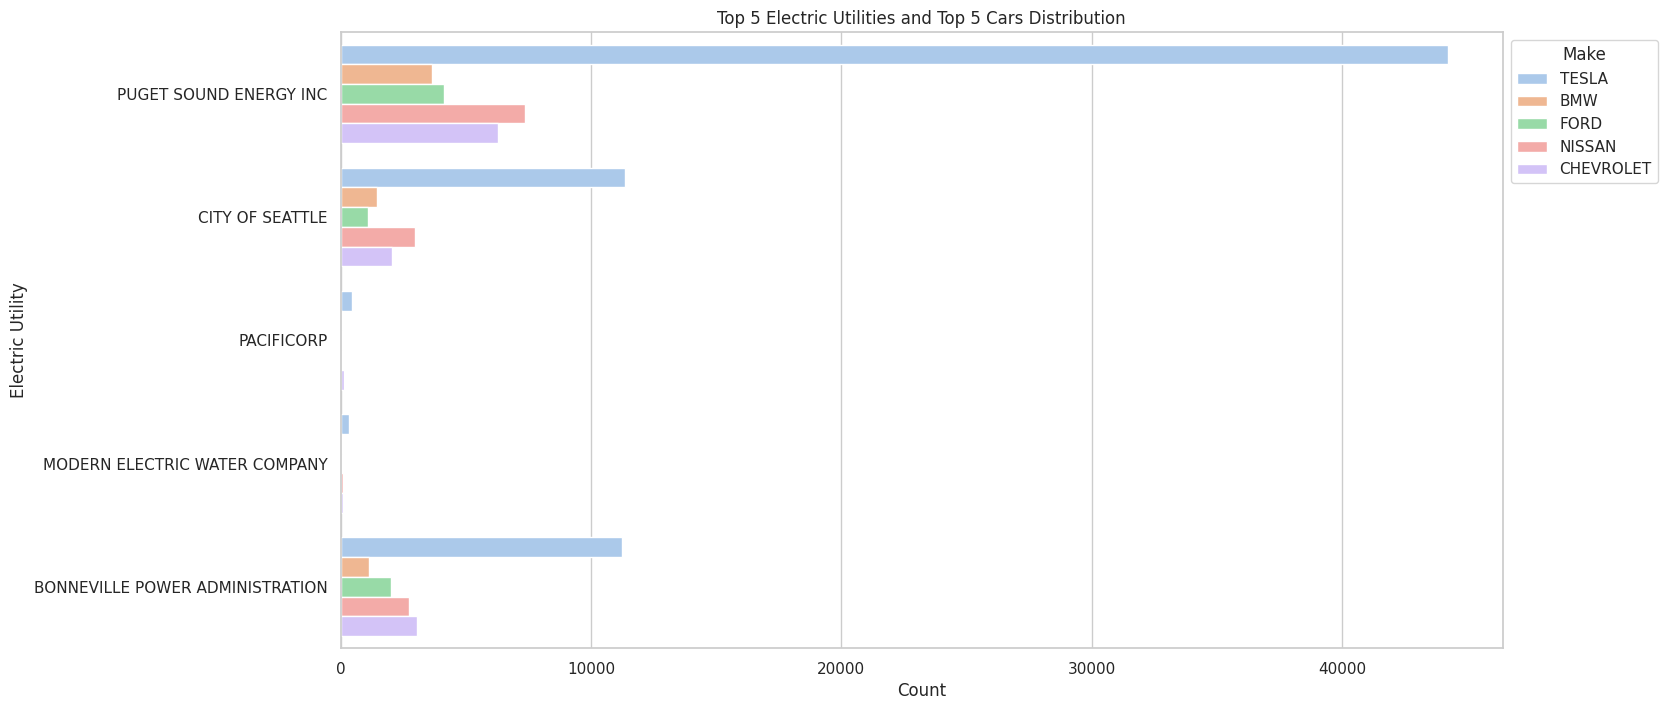

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataframe' is your DataFrame
top_utilities = dataframe['Electric Utility'].value_counts().nlargest(5).index
top_cars = dataframe['Make'].value_counts().nlargest(5).index

# Filter data for the top 5 utilities and top 5 cars
filtered_data = dataframe[dataframe['Electric Utility'].isin(top_utilities) & dataframe['Make'].isin(top_cars)]

plt.figure(figsize=(15, 8))
sns.countplot(data=filtered_data, y='Electric Utility', hue='Make', palette='pastel', dodge=True)
plt.title('Top 5 Electric Utilities and Top 5 Cars Distribution')
plt.ylabel('Electric Utility')
plt.xlabel('Count')
plt.legend(title='Make', bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-49-22aff4b17aec>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataframe['Model Year'], bins=15, palette=sns.color_palette(palette_name))


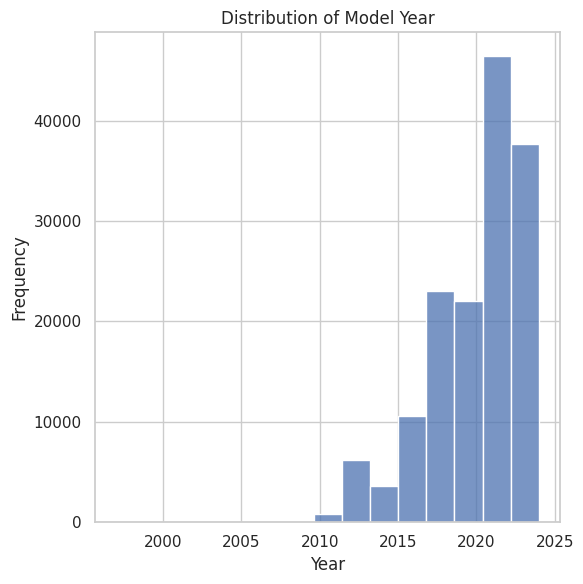

In [ ]:
#Understanding EV growth
# Set Seaborn style
sns.set(style="whitegrid")

# Choose the entire pastel Seaborn color palette
palette_name = "colorblind"

# Create a Seaborn histogram with multiple colors
plt.figure(figsize=(6,6))
sns.histplot(dataframe['Model Year'], bins=15, palette=sns.color_palette(palette_name))
plt.title('Distribution of Model Year')
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



Calculating Percent Change over a decade

In [ ]:
#Calculating Percent Change over a decade
model_year_data = dataframe['Model Year'].value_counts().sort_index(ascending = False).head(11)
decade_change = model_year_data.pct_change(periods=-1) * 100

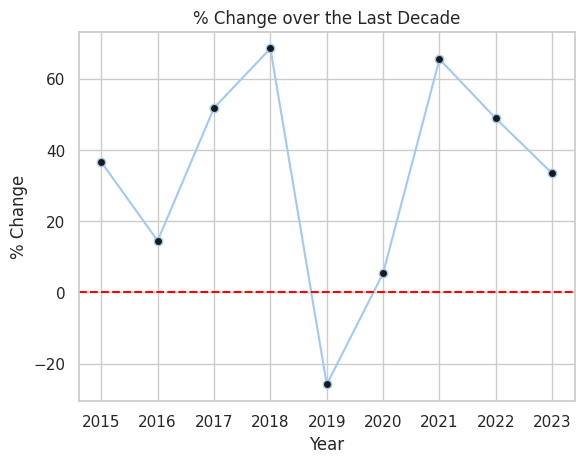

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Choose a pastel Seaborn color palette
palette_name = "pastel"

# Plotting Percent Change except for 2023 with pastel colors
plt.plot(decade_change[1:], color=sns.color_palette(palette_name)[0], marker='o', markerfacecolor='k')
plt.axhline(y=0, color='red', ls='--')
plt.title('% Change over the Last Decade')
plt.xlabel('Year')
plt.ylabel('% Change')

plt.show()


- Electric cars have been growing a lot in the last ten years.
- The percentage change over this time mostly shows things going up, except for a big drop in 2019 that got better quickly.


Text(0.5, 1.0, 'Electric Range of Vehicle over a decade')

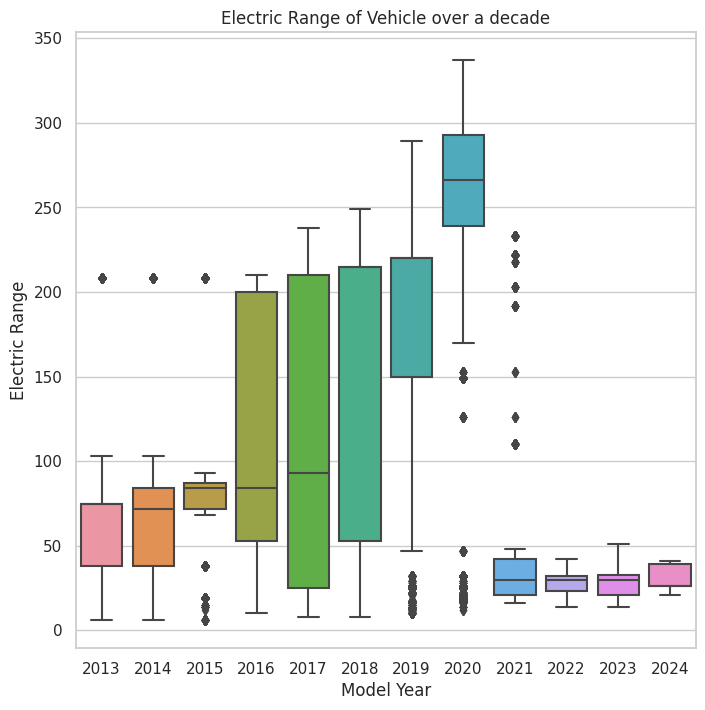

In [ ]:
data_decade = dataframe[(dataframe['Electric Range']>0) & (dataframe['Model Year']>2012)]
plt.figure(figsize=(8,8))
sns.boxplot(data = data_decade, x='Model Year',y='Electric Range')
plt.title("Electric Range of Vehicle over a decade")

Text(0.5, 1.0, 'Electric Range of Vehicle for different Makes')

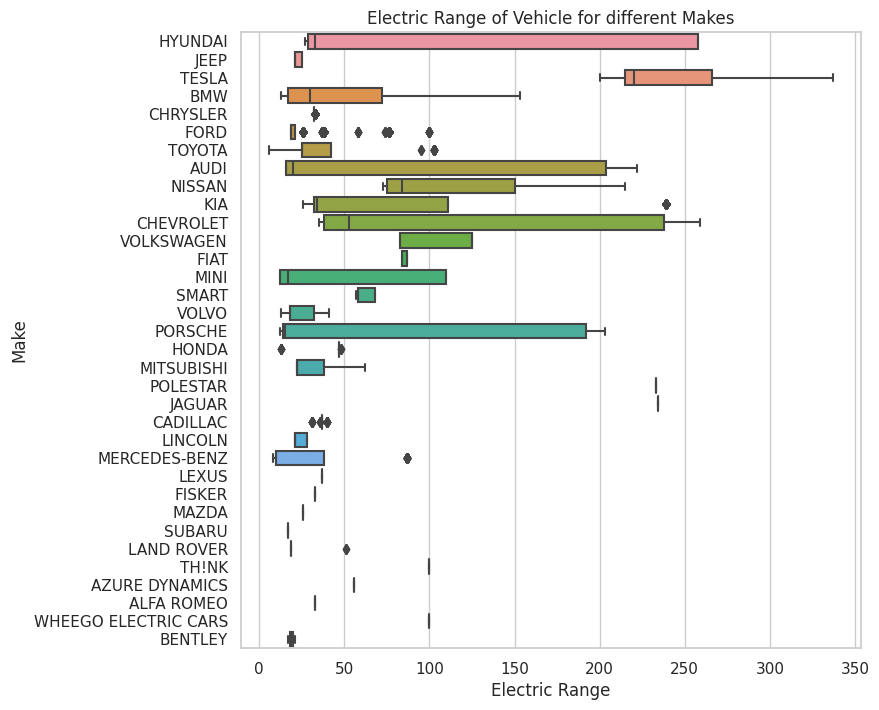

In [ ]:
data_plot = dataframe[(dataframe['Electric Range']>0)]
plt.figure(figsize=(8,8))
sns.boxplot(data = data_plot, y='Make',x='Electric Range')
plt.title("Electric Range of Vehicle for different Makes")

Text(0.5, 1.0, 'Mean Base MSRP for each Make')

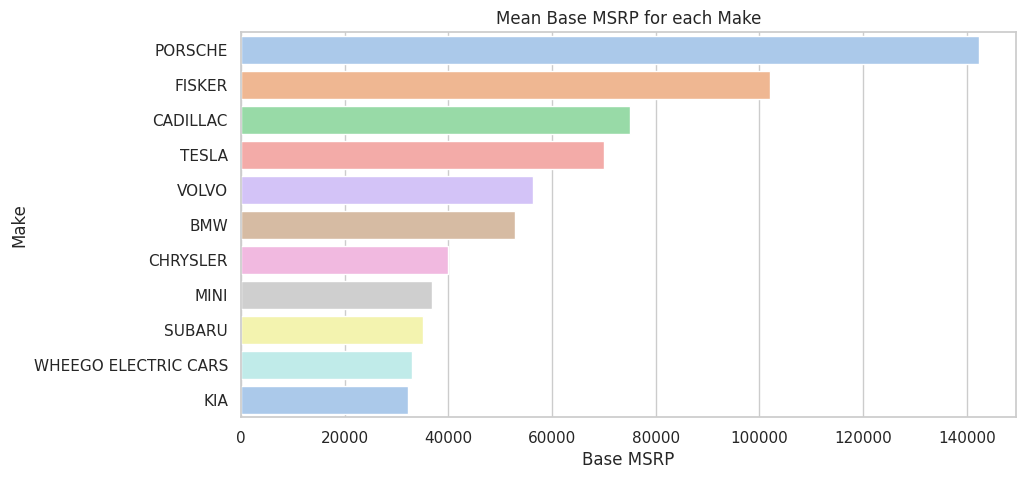

In [ ]:
# Filtering out the missing data
known_MSRP = dataframe[dataframe['Base MSRP'] > 0]

# Calculating the mean price for each particular Make
data_2 = pd.DataFrame(known_MSRP.groupby(['Make'])['Base MSRP'].mean())
data_2.sort_values(by='Base MSRP', ascending=False, inplace=True)


plt.figure(figsize=(10,5))
sns.barplot(data=data_2, y=data_2.index, x="Base MSRP",palette='pastel')
plt.title("Mean Base MSRP for each Make")


: Is there a correlation between the base MSRP (price) of an electric vehicle and
 its electric range?

Text(0.5, 1.0, 'Mean Base MSRP  vs electric range')

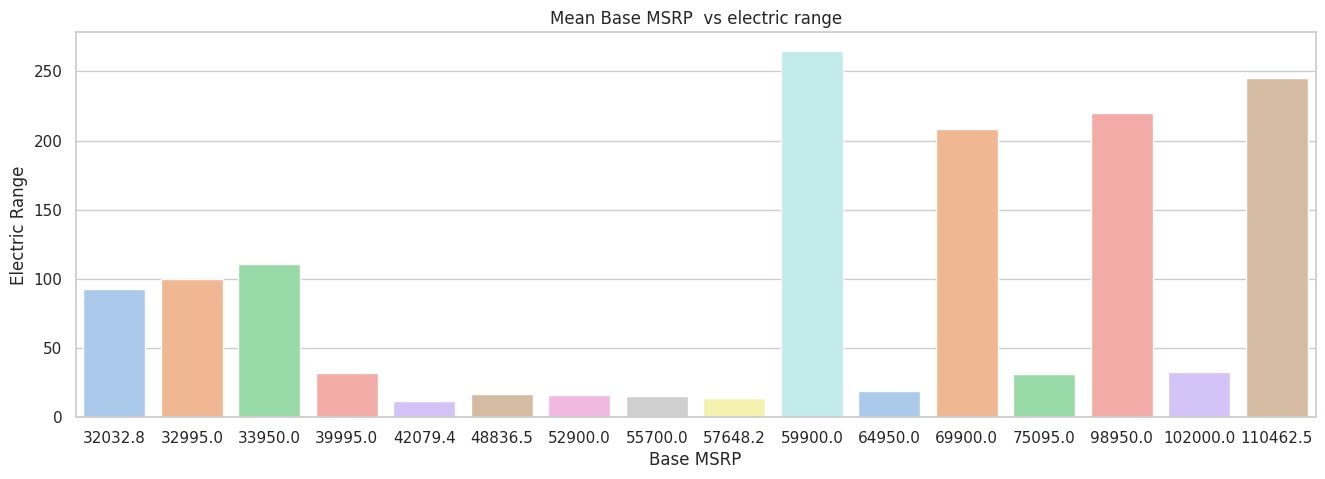

In [ ]:
# Filtering out the missing data
known_MSRP = dataframe[dataframe['Base MSRP'] > 0]

# Calculating the mean price for each particular Make
data_3 = pd.DataFrame(known_MSRP.groupby(['Electric Range'])['Base MSRP'].mean())
data_3['Base MSRP'] = data_3['Base MSRP'].round(1)
data_3.sort_values(by='Base MSRP', ascending=False, inplace=True)


plt.figure(figsize=(16,5))
sns.barplot(data=data_3, y=data_3.index, x="Base MSRP",palette='pastel')
plt.title("Mean Base MSRP  vs electric range")


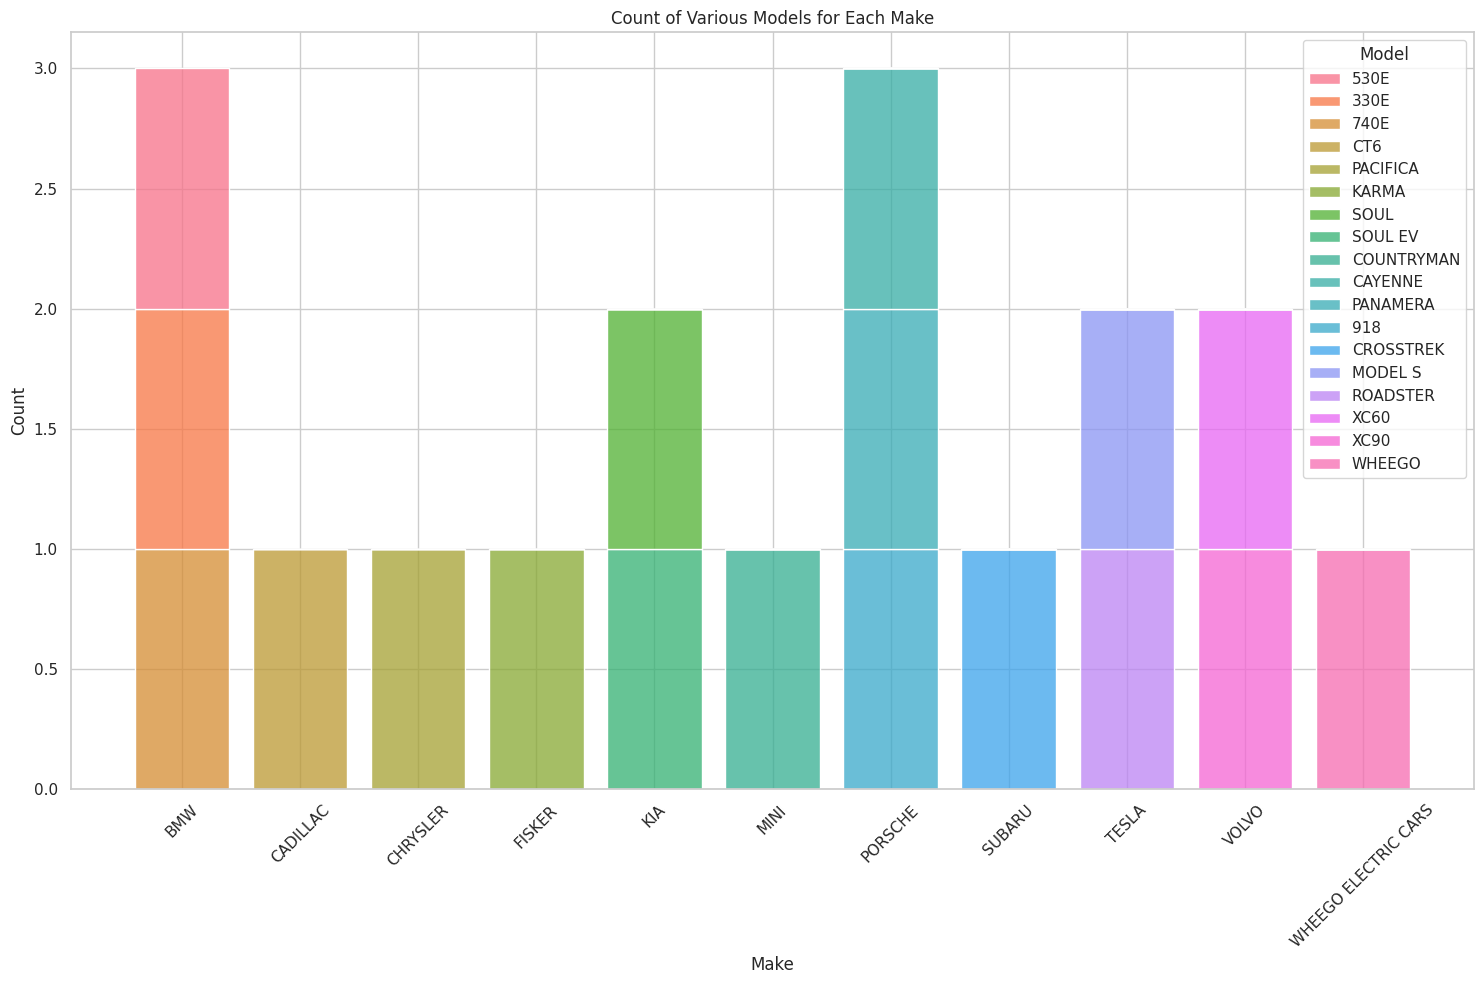

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating summary for counting values of each model for a histogram
summary = pd.DataFrame(known_MSRP.groupby(['Make'])['Model'].value_counts())
summary.columns = ['count']
summary = summary.reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(15,10))
sns.histplot(data=summary, x='Make', hue='Model', multiple="stack", shrink=0.8)
plt.title('Count of Various Models for Each Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
correlation_matrix = dataframe.corr()
print(correlation_matrix)

                      Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000    0.000412       -0.002256  -0.001305   
Model Year               0.000412    1.000000       -0.431335  -0.231585   
Electric Range          -0.002256   -0.431335        1.000000   0.103662   
Base MSRP               -0.001305   -0.231585        0.103662   1.000000   
Legislative District    -0.059313   -0.009986        0.023388   0.012613   
DOL Vehicle ID           0.006011    0.054959       -0.051403  -0.015966   
2020 Census Tract        0.512657    0.008248       -0.002976  -0.001244   
Longitude               -0.762795   -0.007295       -0.000220  -0.001154   
Latitude                 0.379569    0.001442        0.007890   0.004233   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  \
Postal Code                      -0.059313        0.006011           0.512657   
Model Year                       -0.009986        0.054959           0.008248

<ipython-input-58-6cc6925c409c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


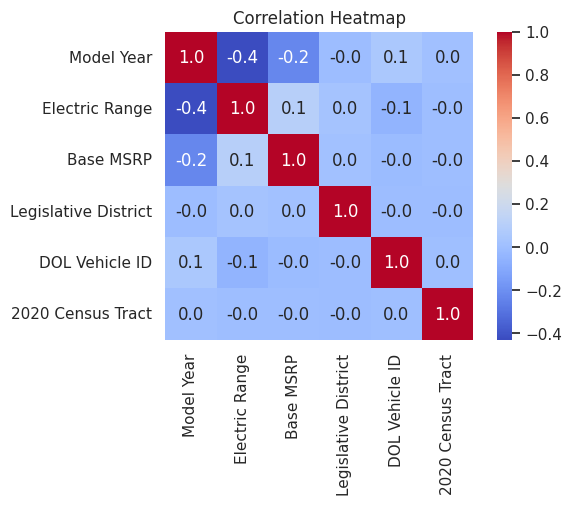

In [ ]:
# Select numeric columns
numeric_columns = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
numeric_data = dataframe[numeric_columns]

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title('Correlation Heatmap')
plt.show()

## **Modeling**

In [ ]:
# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [ ]:

# splitting data and model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [ ]:
# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV



In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.3 MB/s eta 0:00:00


In [ ]:
# feature importance
import shap

In [ ]:
#defining a fucntion of plot pf confusion matrix. this is used in the below models
def plot_cm(cm, chart_title):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart_title}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initials = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initials, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')

    plt.show()


In [ ]:
train.shape

(150479, 18)

In [ ]:
train.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,2,79075,25675,37,98103.0,2020,13,208,0,0,258,0,43.0,249675142,27269,5.303300e+10,-122.343010,47.659185
1,7,79075,4861,37,98011.0,2022,15,663,1,2,25,0,1.0,233928502,88942,5.303302e+10,-122.205780,47.762405
2,4,835,552,37,98908.0,2023,15,663,1,2,25,0,14.0,229675939,1102,5.307700e+10,-120.602720,46.596562
3,245,79075,4622,37,98034.0,2018,31,27708,0,0,215,0,45.0,104714466,88942,5.303302e+10,-122.209285,47.711240
4,8,5403,3634,37,98501.0,2018,4,1917,1,0,97,0,22.0,185498386,88942,5.306701e+10,-122.896920,47.043535


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150479 entries, 0 to 150481
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   VIN (1-10)                                  150479 non-null  int64  
 1   County                                      150479 non-null  int64  
 2   City                                        150479 non-null  int64  
 3   State                                       150479 non-null  int64  
 4   Postal Code                                 150479 non-null  float64
 5   Model Year                                  150479 non-null  int64  
 6   Make                                        150479 non-null  int64  
 7   Model                                       150479 non-null  int64  
 8   Electric Vehicle Type                       150479 non-null  int64  
 9   Clean Alternative Fuel Vehicle Eligibility  150479 non-null  int64  
 

In [ ]:
#train = train.drop("Electric Utility", axis=1)

### **Train Test Splitting**

In [ ]:
sns.set_theme(style="white")

# initialize X as features and y as target
X = train.drop('Electric Vehicle Type', axis=1).values
y = train['Electric Vehicle Type'].values

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [ ]:
# count the occurrences of target value in the 'Electric Vehicle Type' column
train['Electric Vehicle Type'].value_counts()

0    116804
1     33675
Name: Electric Vehicle Type, dtype: int64

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter  # Make sure you import Counter for displaying dataset shapes


In [ ]:
# initialize a NearMiss for undersampling
ns = NearMiss()

# perform undersampling using NearMiss and obtain the resampled dataset
print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))


Original dataset shape: Counter({0: 81763, 1: 23572})
Resample dataset shape: Counter({0: 23572, 1: 23572})


#Naive bayes

In [ ]:
# Naive Bayes Classification and Evaluation
# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# print the result
print("="*60)
print("Accuracy     :", accuracy)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*60)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*60)

print("Confusion Matrix:\n\n", confusion_matrix_result)
print("="*60)

Accuracy     : 0.7213361687045897
ROC AUC Score: 0.5254827899557307
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.88      0.83     35041
           1       0.29      0.17      0.22     10103

    accuracy                           0.72     45144
   macro avg       0.54      0.53      0.52     45144
weighted avg       0.68      0.72      0.69     45144

Confusion Matrix:

 [[30837  4204]
 [ 8376  1727]]


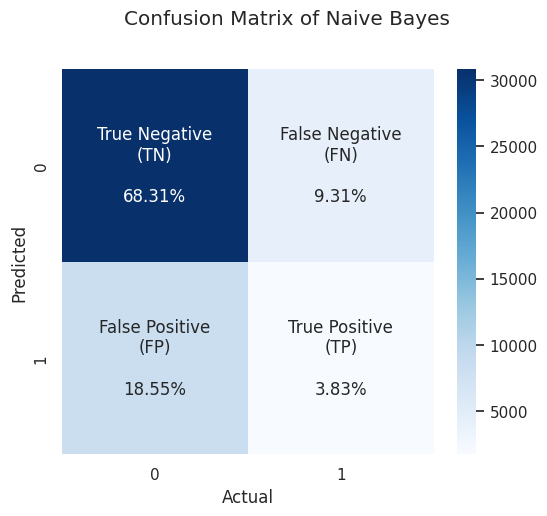

In [ ]:
chart = 'Naive Bayes'

# plot the confusion matrix
plot_cm(confusion_matrix_result, chart)

In [ ]:
# K-Fold Cross-Validation for Untuned Naive Bayes Classifier
# Initialize a K-Fold cross-validation object with 10 folds
kf1 = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation accuracy scores and ROC AUC scores for the untuned NB classifier
nb_before_tuned_cv_acc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf1, n_jobs=-1, scoring='accuracy').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", nb_before_tuned_cv_acc_scores)
print("ROC AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Naive Bayes after a 10 fold cross validation:
Accuracy : 0.5800949316829318
ROC AUC  : 0.7912524530200896


 The grid search will evaluate the Naive Bayes classifier's performance for different values of var_smoothing and select the best hyperparameter.

In [ ]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_nb_acc = GridSearchCV(NB_classifier, param_grid, cv=kf1, n_jobs=-1, scoring='accuracy')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf1, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_nb_acc.fit(X_train_resampled, y_train_resampled)
grid_nb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [ ]:
# Extract and Display Hyperparameter Tuning Results
best_hyperparams_acc = grid_nb_acc.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

# Extract the cross-validation accuracy and ROC AUC scores for the tuned Naive Bayes classifier
nb_after_tuned_cv_acc_scores = grid_nb_acc.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_
# Print the results
print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", nb_after_tuned_cv_acc_scores)
print("ROC AUC  :", nb_after_tuned_cv_rocauc_scores)
# Get the best-tuned Naive Bayes model
best_nb_model = grid_nb_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'var_smoothing': 1e-09}
ROC AUC  :
 {'var_smoothing': 1e-09}

The cross-validation accuracy and ROC AUC score for tuned Naive Bayes after a 10 fold cross validation:
Accuracy : 0.5800949316829318
ROC AUC  : 0.7912524530200896


Evaluattion of  best-tuned Naive Bayes model on training/test data using cross-validation, prints accuracy and ROC AUC scores for each.

In [ ]:
# Evaluate Best-Tuned Naive Bayes Model on Training Data
best_nb_fit_for_train_data_acc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                                 cv=kf1, n_jobs=-1).mean()
best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                                    cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# Print the results for Training Data
print("="*60)
print("Train Data")
print("Accuracy :", best_nb_fit_for_train_data_acc)
print("ROC AUC  :", best_nb_fit_for_train_data_rocauc)

# Evaluate Best-Tuned Naive Bayes Model on Test Data
best_nb_fit_for_test_data_acc = cross_val_score(best_nb_model, X_test, y_test,
                                                cv=kf1, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                                   cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# Print the results for Test Data
print("="*60)
print("Test Data")
print("Accuracy :", best_nb_fit_for_test_data_acc)
print("ROC AUC  :", best_nb_fit_for_test_data_rocauc)


Train Data
Accuracy : 0.5800949316829318
ROC AUC  : 0.7912524530200896
Test Data
Accuracy : 0.7755184976382079
ROC AUC  : 0.7152844042989862


# Logistic Regression

In [ ]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred2 = LR_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy2 = accuracy_score(y_test, y_pred2)
confusion_matrix_results2 = confusion_matrix(y_test, y_pred2)

# print the result
print("="*60)
print("Accuracy     :", accuracy2)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred2))

print("="*60)
print("Classification Report:\n\n", classification_report(y_test, y_pred2))
print("="*60)

print("Confusion Matrix:\n\n", confusion_matrix_results2)
print("="*60)

Accuracy     : 0.5133351054403686
ROC AUC Score: 0.5183990559744266
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.51      0.62     35041
           1       0.24      0.53      0.33     10103

    accuracy                           0.51     45144
   macro avg       0.51      0.52      0.47     45144
weighted avg       0.67      0.51      0.55     45144

Confusion Matrix:

 [[17844 17197]
 [ 4773  5330]]


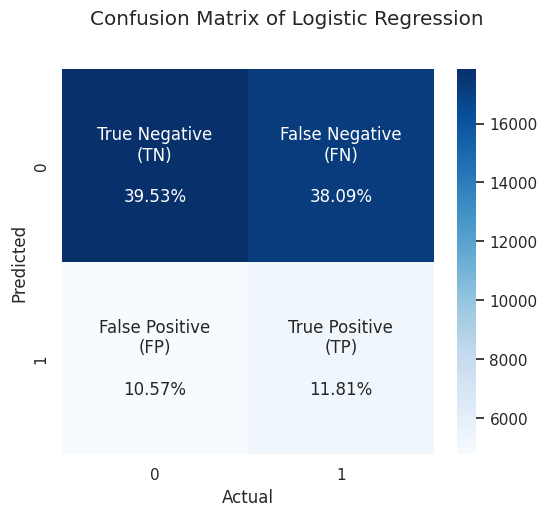

In [ ]:
chart = 'Logistic Regression'

# plot the confusion matrix
plot_cm(confusion_matrix_results2, chart)

In [ ]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned LR classifier
lr_before_tuned_cv_acc_scores2 = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf1, n_jobs=-1, scoring='accuracy').mean()
lr_before_tuned_cv_rocauc_scores2 = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", lr_before_tuned_cv_acc_scores2)
print("ROC AUC  :", lr_before_tuned_cv_rocauc_scores2)

The cross-validation accuracy and ROC AUC score for untuned Logistic Regression after a 10 fold cross validation:
Accuracy : 0.5952402288978342
ROC AUC  : 0.5796176387162966


In [ ]:
print(LR_classifier.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Hyperparameter tuning :grid search for Logistic Regression hyperparameters, aiming to optimize accuracy and ROC AUC score.


In [ ]:
# Logistic Regression Hyperparameter Tuning
# Define a parameter grid for grid search
param_grid = {
    'penalty': ['l2', 'none'],  # lbfgs only supports 'l2' or 'none'
    'C': [0.1, 1, 10, 20],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'random_state': [None, 42, 21],
    'warm_start': [True, False]
}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_lr_acc = GridSearchCV(LR_classifier, param_grid, cv=kf1, n_jobs=-1, scoring='accuracy')
grid_lr_rocauc = GridSearchCV(LR_classifier, param_grid, cv=kf1, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_lr_acc.fit(X_train_resampled, y_train_resampled)
grid_lr_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300], 'penalty': ['l2', 'none'],
                         'random_state': [None, 42, 21],
                         'warm_start': [True, False]},
             scoring='roc_auc')

In [ ]:
# Extract and Display Logistic Regression Hyperparameter Tuning Results
best_hyperparams_acc2 = grid_lr_acc.best_params_
best_hyperparams_rocauc2 = grid_lr_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc2)
print("ROC AUC  :\n", best_hyperparams_rocauc2)
# Extract the cross-validation accuracy and ROC AUC scores for the tuned Logistic Regression model
lr_after_tuned_cv_acc_scores2 = grid_lr_acc.best_score_
lr_after_tuned_cv_rocauc_scores2 = grid_lr_rocauc.best_score_
# Print the results
print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", lr_after_tuned_cv_acc_scores2)
print("ROC AUC  :", lr_after_tuned_cv_rocauc_scores2)
# Get the best-tuned Logistic Regression model
best_lr_model = grid_lr_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}
ROC AUC  :
 {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}

The cross-validation accuracy and ROC AUC score for tuned Logistic Regression after a 10 fold cross validation:
Accuracy : 0.5954310595770547
ROC AUC  : 0.5796190602949384


In [ ]:
# Evaluate Best-Tuned Logistic Regression Model on Training Data
best_lr_fit_for_train_data_acc2 = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf1, n_jobs=-1).mean()

best_lr_fit_for_train_data_rocauc2 = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf1, n_jobs=-1, scoring='roc_auc').mean()
# Print the results for Training Data
print("="*60)
print("Train Data resutls for Logistic Regression")
print("Accuracy :", best_lr_fit_for_train_data_acc2)
print("ROC AUC  :", best_lr_fit_for_train_data_rocauc2)
# Evaluate Best-Tuned Logistic Regression Model on Test Data
best_lr_fit_for_test_data_acc2 = cross_val_score(best_lr_model, X_test, y_test,
                                            cv=kf1, n_jobs=-1).mean()
best_lr_fit_for_test_data_rocauc2 = cross_val_score(best_lr_model, X_test, y_test,
                                             cv=kf1, n_jobs=-1, scoring='roc_auc').mean()
# Print the results for Test Data
print("="*60)
print("Test Data resutls for Logistic Regression")
print("Accuracy :", best_lr_fit_for_test_data_acc2)
print("ROC AUC  :", best_lr_fit_for_test_data_rocauc2)

Train Data resutls for Logistic Regression
Accuracy : 0.5954310595770547
ROC AUC  : 0.5796190602949384
Test Data resutls for Logistic Regression
Accuracy : 0.6383933680426246
ROC AUC  : 0.5270226101152191


# Random Forest

In [ ]:
# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy3 = accuracy_score(y_test, y_pred)
confusion_matrix_resutls3 = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Accuracy     :", accuracy3)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", confusion_matrix_resutls3)
print("="*55)

Accuracy     : 0.998936735778841
ROC AUC Score: 0.9992798667884766
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35041
           1       1.00      1.00      1.00     10103

    accuracy                           1.00     45144
   macro avg       1.00      1.00      1.00     45144
weighted avg       1.00      1.00      1.00     45144

Confusion Matrix:

 [[34994    47]
 [    1 10102]]


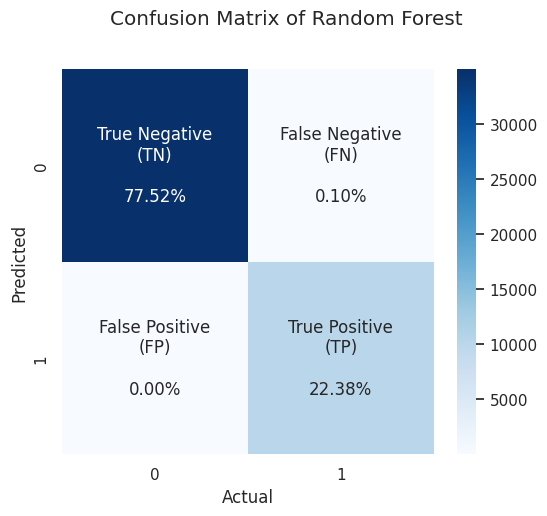

In [ ]:
chart = 'Random Forest'

# plot the confusion matrix
plot_cm(confusion_matrix_resutls3, chart)

In [ ]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned RF classifier
rf_before_tuned_cv_acc_scores3 = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf1, n_jobs=-1, scoring='accuracy').mean()
rf_before_tuned_cv_rocauc_scores3 = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", rf_before_tuned_cv_acc_scores3)
print("ROC AUC  :", rf_before_tuned_cv_rocauc_scores3)

The cross-validation accuracy and ROC AUC score for untuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9996394080762118
ROC AUC  : 0.9999759964595357


In [ ]:
print(RF_classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Random Forest Hyperparameter Tuning
# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False],
}

# initialize GridSearchCV objects for accuracy and ROC AUC score
grid_rf_acc = GridSearchCV(RF_classifier, param_grid, cv=kf1, n_jobs=-1, scoring='accuracy')
grid_rf_rocauc = GridSearchCV(RF_classifier, param_grid, cv=kf1, n_jobs=-1, scoring='roc_auc')

# perform grid search for accuracy and ROC AUC score
grid_rf_acc.fit(X_train_resampled, y_train_resampled)
grid_rf_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='roc_auc')

In [ ]:
# Extract and Display Random Forest Hyperparameter Tuning Results
best_hyperparams_acc3 = grid_rf_acc.best_params_
best_hyperparams_rocauc3 = grid_rf_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc3)
print("ROC AUC  :\n", best_hyperparams_rocauc3)

# Extract the cross-validation accuracy and ROC AUC scores for the tuned Random Forest model
rf_after_tuned_cv_acc_scores3 = grid_rf_acc.best_score_
rf_after_tuned_cv_rocauc_scores3 = grid_rf_rocauc.best_score_

# Print the results
print(f"\nThe cross-validation accuracy and ROC AUC score for tuned Random Forest after a 10-fold cross-validation:")
print("Accuracy :", rf_after_tuned_cv_acc_scores3)
print("ROC AUC  :", rf_after_tuned_cv_rocauc_scores3)

# Get the best-tuned Random Forest model
best_rf_model = grid_rf_acc.best_estimator_


Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}
ROC AUC  :
 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 150}

The cross-validation accuracy and ROC AUC score for tuned Random Forest after a 10-fold cross-validation:
Accuracy : 0.9997454616131819
ROC AUC  : 0.9999902195268531


In [ ]:
# Evaluate Best-Tuned Random Forest Model on Training Data
best_rf_fit_for_train_data_acc3 = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                                 cv=kf1, n_jobs=-1).mean()
best_rf_fit_for_train_data_rocauc3 = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                                    cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# Print the results for Training Data
print("="*60)
print("Train Data results for Random Forest")
print("Accuracy :", best_rf_fit_for_train_data_acc3)
print("ROC AUC  :", best_rf_fit_for_train_data_rocauc3)

# Evaluate Best-Tuned Random Forest Model on Test Data
best_rf_fit_for_test_data_acc3 = cross_val_score(best_rf_model, X_test, y_test,
                                                cv=kf1, n_jobs=-1).mean()
best_rf_fit_for_test_data_rocauc3 = cross_val_score(best_rf_model, X_test, y_test,
                                                   cv=kf1, n_jobs=-1, scoring='roc_auc').mean()

# Print the results for Test Data
print("="*60)
print("Test Data results for Random Forest")
print("Accuracy :", best_rf_fit_for_test_data_acc3)
print("ROC AUC  :", best_rf_fit_for_test_data_rocauc3)

Train Data results for Random Forest
Accuracy : 0.9997454616131819
ROC AUC  : 0.9999765187990942
Test Data results for Random Forest
Accuracy : 0.9997120218088575
ROC AUC  : 0.9999809242392395


# Model Evaluation

Summarizing the performance metrics (Accuracy and ROC-AUC) of Naive Bayes, Logistic Regression, and Random Forest models on both training and test datasets. .

In [ ]:
# Define a dictionary with model names and their corresponding performance metrics
dict_result1 = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'Random Forest'],
    "Accuracy (train)": [best_nb_fit_for_train_data_acc, best_lr_fit_for_train_data_acc2, best_rf_fit_for_train_data_acc3],
    "Accuracy (test)": [best_nb_fit_for_test_data_acc, best_lr_fit_for_test_data_acc2, best_rf_fit_for_test_data_acc3],
    "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_lr_fit_for_train_data_rocauc2, best_rf_fit_for_train_data_rocauc3],
    "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_lr_fit_for_test_data_rocauc2, best_rf_fit_for_test_data_rocauc3]
}

# Create a DataFrame from the dictionary and sort it based on ROC-AUC and Accuracy for the test dataset
model_result1 = pd.DataFrame(dict_result1).sort_values(by=['ROC-AUC (test)', 'Accuracy (test)'], ascending=False).reset_index(drop=True)

# Display the final model performance results
model_result1


,Model,Accuracy (train),Accuracy (test),ROC-AUC (train),ROC-AUC (test)
0,Random Forest,0.999745,0.999712,0.999977,0.999981
1,Naive Bayes,0.580095,0.775518,0.791252,0.715284
2,Logistic Regression,0.595431,0.638393,0.579619,0.527023


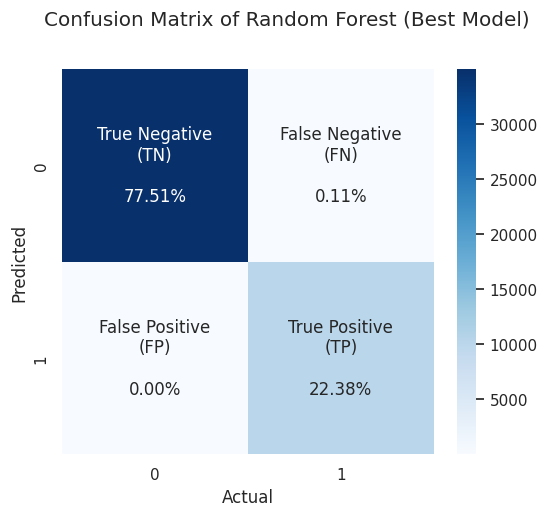

In [ ]:
chart = 'Random Forest (Best Model)'

cm_final = confusion_matrix(y_test, best_rf_model.predict(X_test))

plot_cm(cm_final, chart)

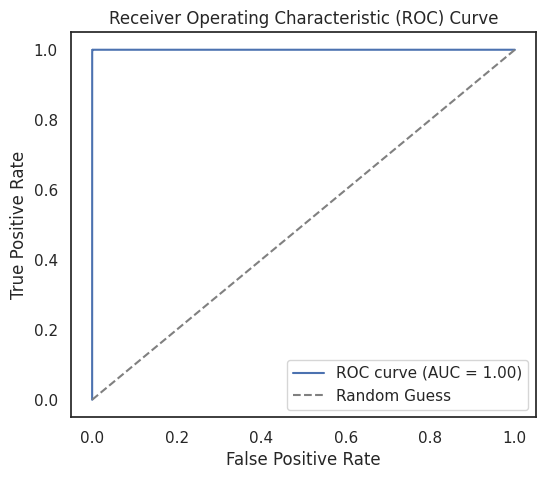

In [ ]:
# Evaluate and Plot ROC Curve for Best Random Forest Model on Test Data
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for positive class (class 1) from the best Random Forest model
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


above code predicted probabilities from the best Random Forest model on the test data to plot the Receiver Operating Characteristic (ROC) curve. The AUC (Area Under the Curve) is also displayed on the plot.

In [ ]:
train.shape

(150479, 18)

In [ ]:
X = train.drop('Electric Vehicle Type', axis=1)
y = train['Electric Vehicle Type']

In [ ]:
X.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude'],
      dtype='object')

#### The below code defines a SHAP (SHapley Additive exPlanations) explainer object using the best Random Forest model, extracts the importance values (SHAP values), and plots them into a bar plot. The plot illustrates the feature importance based on the SHAP values.

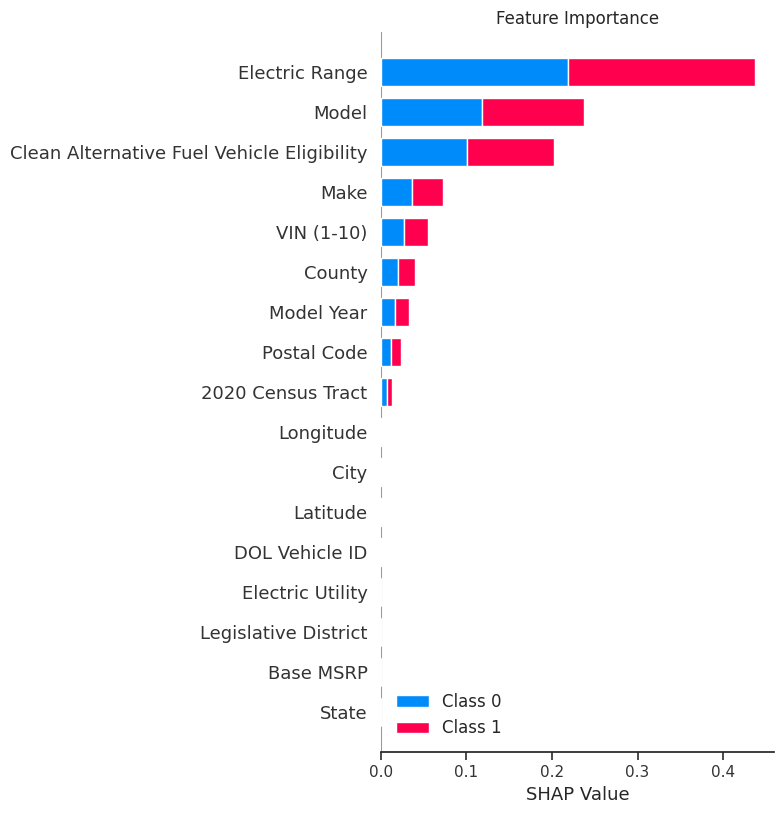

In [ ]:
# define an explainer object using the best model, get the importance values, and plot into a bar plot
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar', show=False)

plt.xlabel('SHAP Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Get the feature importances from the best Random Forest model
importance = best_rf_model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=False)\
                                    .reset_index(drop=True)
# Display the top features along with their importances
feature_importance.head()

,Feature,Importance
0,Electric Range,0.438781
1,Model,0.188407
2,Clean Alternative Fuel Vehicle Eligibility,0.168671
3,Make,0.066379
4,VIN (1-10),0.040734


 How has the annual adoption rate of electric vehicles in Washington state
evolved over the years? Can we forecast the adoption rate for the upcoming years based on
historical data?

# PREDICTION

In [ ]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions_all = pd.DataFrame({'Prediction': best_rf_model.predict(train.drop('Electric Vehicle Type', axis=1))})
result_all = pd.concat([predictions_all, train], axis=1).rename(columns={'Electric Vehicle Type': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Predicted', 'Actual', 'VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
           'Model', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range', 'Base MSRP',
           'Legislative District', 'DOL Vehicle ID', 'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude']
result_all = result_all[columns]

# map the numerical labels to their corresponding vehicle types
result_all['Electric Vehicle Type (Actual)'] = result_all['Actual'].map({1: 'PHEV', 0: 'BEV'})
result_all['Electric Vehicle Type (Predicted)'] = result_all['Predicted'].map({1: 'PHEV', 0: 'BEV'})

# convert specific columns to integer type
integer_columns = ['Predicted', 'Actual', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
                   'Legislative District', '2020 Census Tract']
result_all[integer_columns] = result_all[integer_columns].astype('Int64')

result_all.head()

X has feature names, but RandomForestClassifier was fitted without feature names


,Predicted,Actual,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,...,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,2.0,79075.0,25675.0,37.0,98103,2020,13.0,208.0,...,258,0,43,249675142.0,27269.0,53033004800,-122.343010,47.659185,BEV,BEV
1,1,1,7.0,79075.0,4861.0,37.0,98011,2022,15.0,663.0,...,25,0,1,233928502.0,88942.0,53033021804,-122.205780,47.762405,PHEV,PHEV
2,1,1,4.0,835.0,552.0,37.0,98908,2023,15.0,663.0,...,25,0,14,229675939.0,1102.0,53077002900,-120.602720,46.596562,PHEV,PHEV
3,0,0,245.0,79075.0,4622.0,37.0,98034,2018,31.0,27708.0,...,215,0,45,104714466.0,88942.0,53033021903,-122.209285,47.711240,BEV,BEV
4,1,1,8.0,5403.0,3634.0,37.0,98501,2018,4.0,1917.0,...,97,0,22,185498386.0,88942.0,53067010700,-122.896920,47.043535,PHEV,PHEV


In [ ]:
# initialize the list of columns to copy
columns_to_copy = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility',
                   'DOL Vehicle ID', 'Electric Utility']

# iterate over list to copy values
for column in columns_to_copy:
    result_all[column] = dataframe[column]
result_all.head()

,Predicted,Actual,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,...,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,KM8K33AGXL,King,Seattle,Washington,98103,2020,HYUNDAI,KONA,...,258,0,43,249675142.0,CITY OF SEATTLE,53033004800,-122.343010,47.659185,BEV,BEV
1,1,1,1C4RJYB61N,King,Bothell,Washington,98011,2022,JEEP,GRAND CHEROKEE,...,25,0,1,233928502.0,PUGET SOUND ENERGY INC,53033021804,-122.205780,47.762405,PHEV,PHEV
2,1,1,1C4RJYD61P,Yakima,Yakima,Washington,98908,2023,JEEP,GRAND CHEROKEE,...,25,0,14,229675939.0,PACIFICORP,53077002900,-120.602720,46.596562,PHEV,PHEV
3,0,0,5YJ3E1EA7J,King,Kirkland,Washington,98034,2018,TESLA,MODEL 3,...,215,0,45,104714466.0,PUGET SOUND ENERGY INC,53033021903,-122.209285,47.711240,BEV,BEV
4,1,1,WBY7Z8C5XJ,Thurston,Olympia,Washington,98501,2018,BMW,I3,...,97,0,22,185498386.0,PUGET SOUND ENERGY INC,53067010700,-122.896920,47.043535,PHEV,PHEV
